<a href="https://colab.research.google.com/github/yuktiverma43/Data-Science-Projects/blob/main/Git_Hub_Trade_%26_Ahead_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

**Context**

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

**Objective**

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

**Data Dictionary**

**Ticker Symbol:** An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market

**Company:** Name of the company

**GICS Sector:** The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

**GICS Sub Industry:** The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

**Current Price:** Current stock price in dollars

**Price Change:** Percentage change in the stock price in 13 weeks

**Volatility:** Standard deviation of the stock price over the past 13 weeks

**ROE:** A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)

**Cash Ratio:** The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities

**Net Cash Flow:** The difference between a company's cash inflows and outflows (in dollars)

**Net Income:** Revenues minus expenses, interest, and taxes (in dollars)

**Earnings Per Share:** Company's net profit divided by the number of common shares it has outstanding (in dollars)

**Estimated Shares Outstanding:** Company's stock currently held by all its shareholders

**P/E Ratio:** Ratio of the company's current stock price to the earnings per share

**P/B Ratio:** Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

**Importing necessary libraries and data**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

**Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_data.csv')

**Data Overview**

In [ ]:
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [ ]:
data.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

In [ ]:
data.shape

(340, 15)

**Observation**

The data set has 340 rows and 15 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observation**

The data type of Columns Ticker Symbol, Security, GICS Sector and GICS Sub Industry are of object type and remaining all the columns are of int/float type.

In [ ]:
data.describe()

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
count     340.000000    340.000000  340.000000  340.000000  340.000000   
mean       80.862345      4.078194    1.525976   39.597059   70.023529   
std        98.055086     12.006338    0.591798   96.547538   90.421331   
min         4.500000    -47.129693    0.733163    1.000000    0.000000   
25%        38.555000     -0.939484    1.134878    9.750000   18.000000   
50%        59.705000      4.819505    1.385593   15.000000   47.000000   
75%        92.880001     10.695493    1.695549   27.000000   99.000000   
max      1274.949951     55.051683    4.580042  917.000000  958.000000   

       Net Cash Flow    Net Income  Earnings Per Share  \
count   3.400000e+02  3.400000e+02          340.000000   
mean    5.553762e+07  1.494385e+09            2.776662   
std     1.946365e+09  3.940150e+09            6.587779   
min    -1.120800e+10 -2.352800e+10          -61.200000   
25%    -1.939065e+08  3.523012e+08            1.557500   
50%     2.098000e+06  7.073360e+08            2.895000   
75%     1.698108e+08  1.899000e+09            4.620000   
max     2.076400e+10  2.444200e+10           50.090000   

       Estimated Shares Outstanding   P/E Ratio   P/B Ratio  
count                  3.400000e+02  340.000000  340.000000  
mean                   5.770283e+08   32.612563   -1.718249  
std                    8.458496e+08   44.348731   13.966912  
min                    2.767216e+07    2.935451  -76.119077  
25%                    1.588482e+08   15.044653   -4.352056  
50%                    3.096751e+08   20.819876   -1.067170  
75%                    5.731175e+08   31.764755    3.917066  
max                    6.159292e+09  528.039074  129.064585

**Observation**

1. The mean price of stocks is 80 dollar with minimum price of 4.50 dollar and maximum price of 1274.94 dollar. 25% of stocks are below 38.55 dollar and 50% stocks are below 59.70 dollar and 75% of stocks are below 92.88 dollar.
2. The mean percentage change in stock price in 13 weeks is 4.078% with min percentage change is -47.12% and max percent change is 55.05%.
3. The mean volatility which is standard deviation of stock price in past 13 weeks is 1.52 with min volatility is 0.73 and max volatility is 4.58.
4. The mean ROE which is net income by shareholder’s equity is 39.59 with min ROE as 1 and max ROE as 917. 75% of ROE is below 27.
5. The mean cash ratio is 70.02 which is ratio of total of cash and cash equivalents to its total current liabilities. The min cash ratio is 0 and max cash ratio is 958.
6. The min net cash flow and net income is negative.
7. The mean Earning per share(Company's net profit divided by the number of common shares it has outstanding (in dollars)) is 2.77 with min earning per share is -61.2 and max is 50.09. 25% of company earning per share is below 1.55 and 75% of earning per share is below 4.62.
8. There are many outstanding shares held by all shareholders.
9. The mean P/E ratio which is ratios of company’s current stock price to earning per share is 32.61 with min P/E ratio is 2.93 and max is 528.03.
10. The mean P/B ratio which is Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities) is -1.71 with min is -76.11 and max is 129.06.

In [ ]:
data.describe(include='object')

Ticker Symbol Security  GICS Sector                   GICS Sub Industry
count            340      340          340                                 340
unique           340      340           11                                 104
top              ZTS   Zoetis  Industrials  Oil & Gas Exploration & Production
freq               1        1           53                                  16

**Observation**

1. There are total of 11 GICS Sector. Top Sector is Industrials with frequency of 53.
2. There are total of 104 GICS Sub industry and top industry is Oil and Gas Exploration and Production with frequency of 16.
3. Ticker Symbol and Security have unique values.

In [ ]:
col_obj=data.select_dtypes(include='object')
for i in col_obj:
  print(i)
  print(data[i].nunique())
  print(data[i].unique())
  print(data[i].value_counts())
  print("*"*50)

Ticker Symbol
340
['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APH' 'ARNC'
 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAC' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB'
 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CF' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME'
 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS'
 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EMN' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN'
 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FB' 'FBHS' 'FCX' 'FE'
 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP'
 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN'
 'HCP' 'HES' 'HIG' 'HOG' 'HON' 'HPE' 'HPQ' 

**Observation**

1. The total of GICS Sector is 11 and industrials have 53 frequency; Financials have 49; Health care has 40; Consumer discretionary has 40; IT has 33 and min frequency occurrence is of Telecommunication services with frequency of 5.
2. The max GICS Sub industry frequency is of Oil and Gas Exploration and Production with 16 as frequency followed by 14 REIT and 14 Industrial Conglomerates and many company have min frequency of 1.

In [ ]:
data.columns= [c.replace(' ','_') for c in data.columns]

**Observation**

Replacing all the column names with spaces in between with _.

In [ ]:
data.columns

Index(['Ticker_Symbol', 'Security', 'GICS_Sector', 'GICS_Sub_Industry',
       'Current_Price', 'Price_Change', 'Volatility', 'ROE', 'Cash_Ratio',
       'Net_Cash_Flow', 'Net_Income', 'Earnings_Per_Share',
       'Estimated_Shares_Outstanding', 'P/E_Ratio', 'P/B_Ratio'],
      dtype='object')

In [ ]:
df=data.copy()

In [ ]:
df=df.drop(['Ticker_Symbol'],axis=1)

**Observation**

As Ticker Symbol has unique values, we will drop this column.

In [ ]:
df1=df.copy()

In [ ]:
df.head()

Security             GICS_Sector      GICS_Sub_Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding   P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B_Ratio  
0  -8.784219  
1  -8.750068  
2  -0.394171  
3   4.199651  
4   1.059810

In [ ]:
df1.head()

Security             GICS_Sector      GICS_Sub_Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding   P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B_Ratio  
0  -8.784219  
1  -8.750068  
2  -0.394171  
3   4.199651  
4   1.059810

**Observation**

Made two copies of data set as df and df1 for Kmeans and Hierachial Clustering.

**Exploratory Data Analysis (EDA)**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, fontsize=(15,10)):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

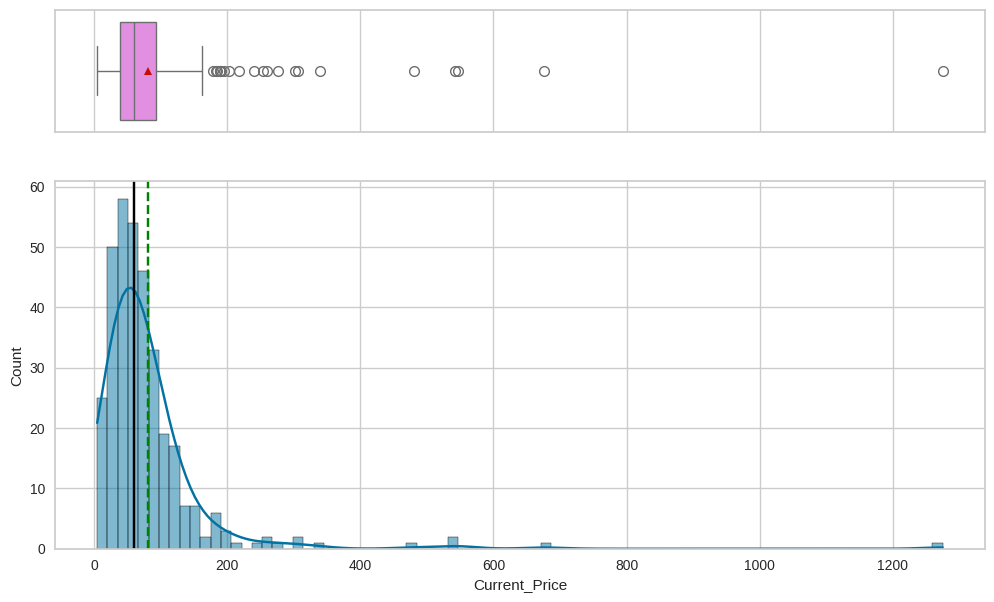

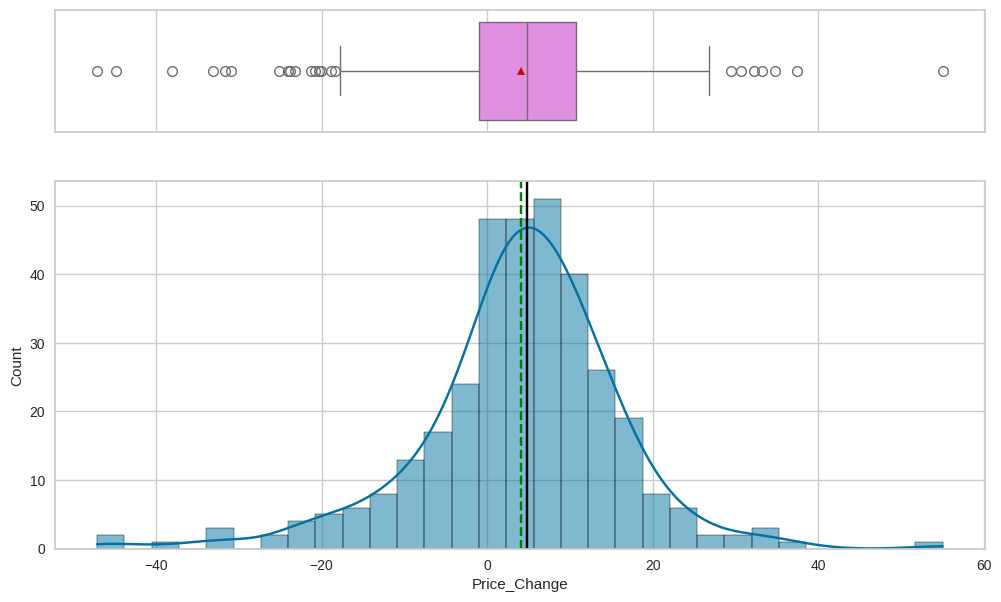

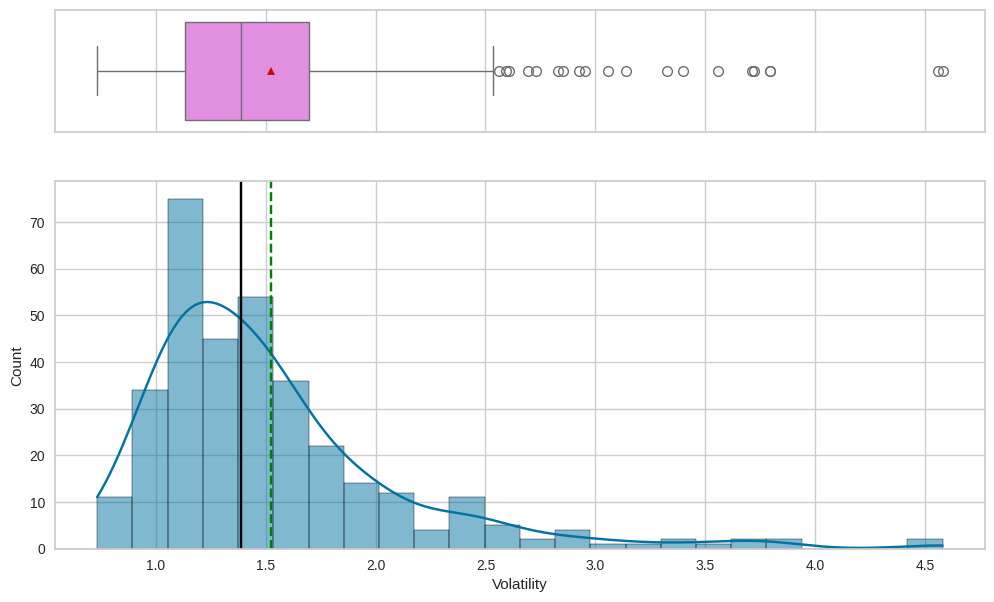

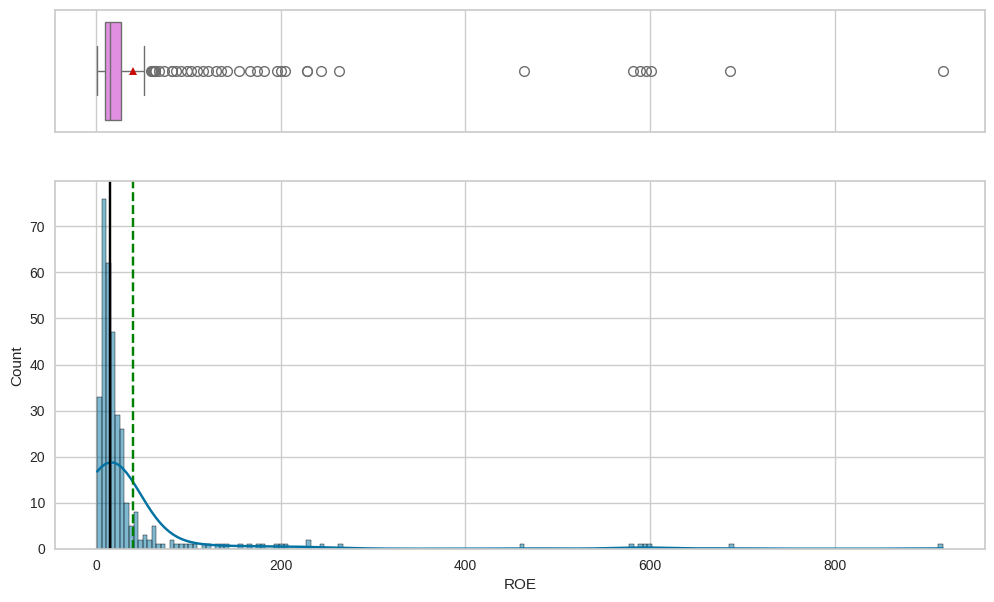

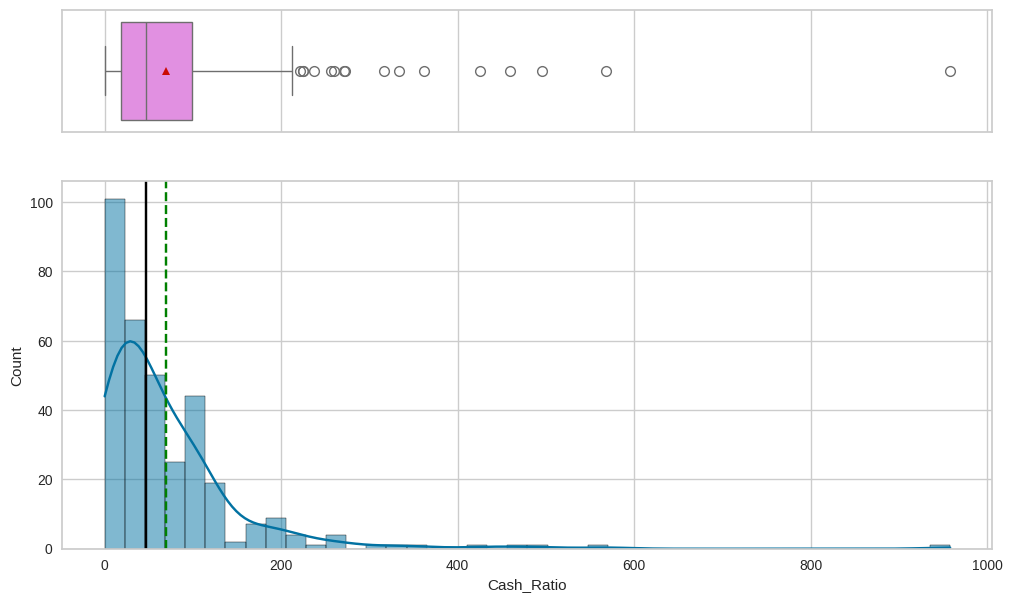

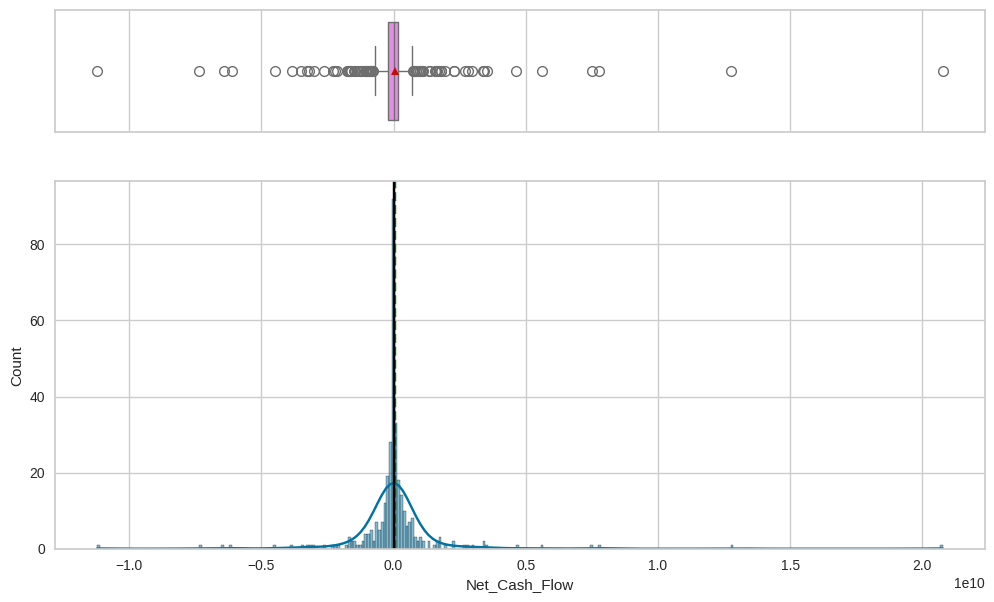

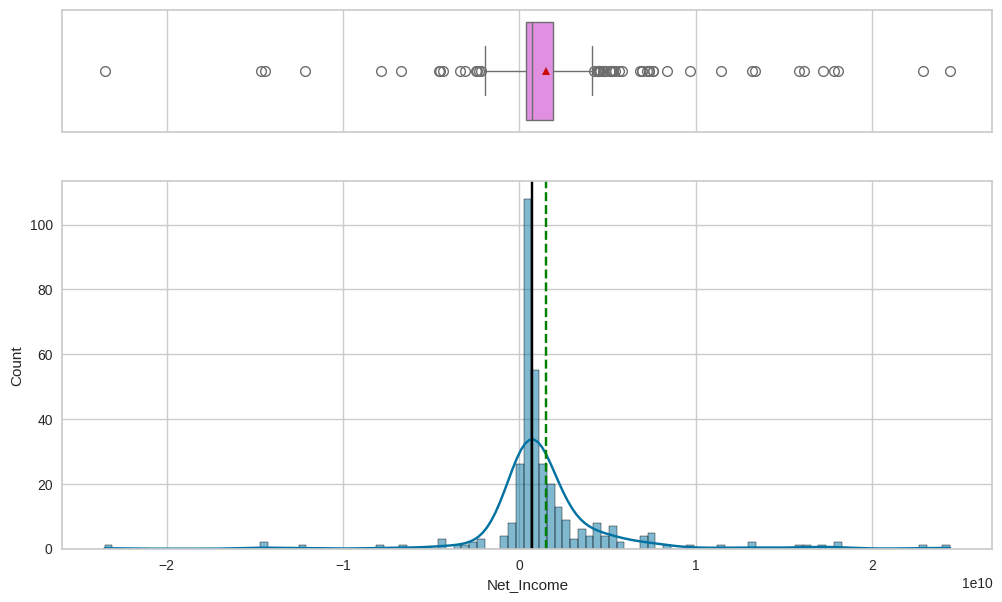

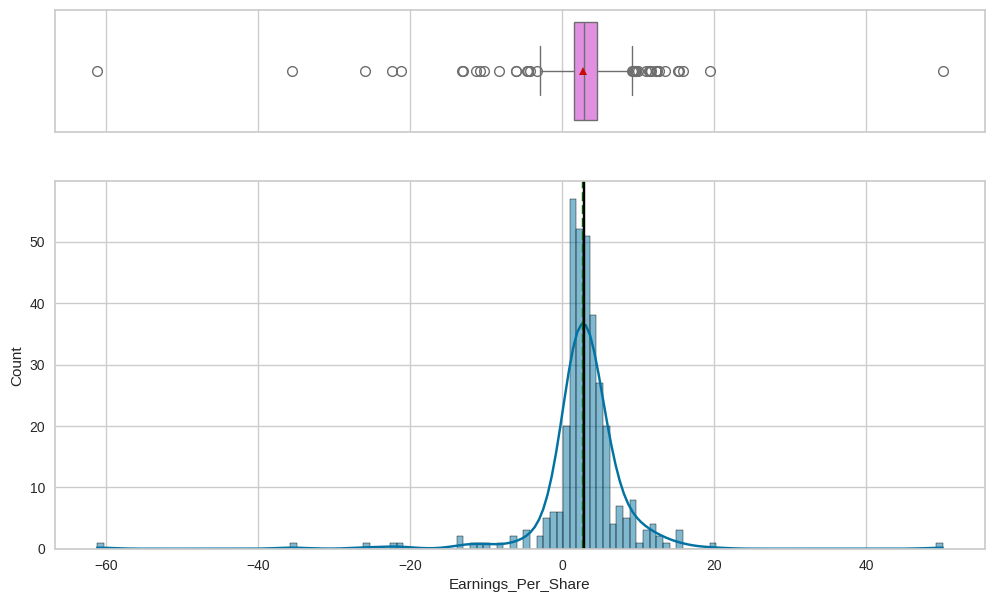

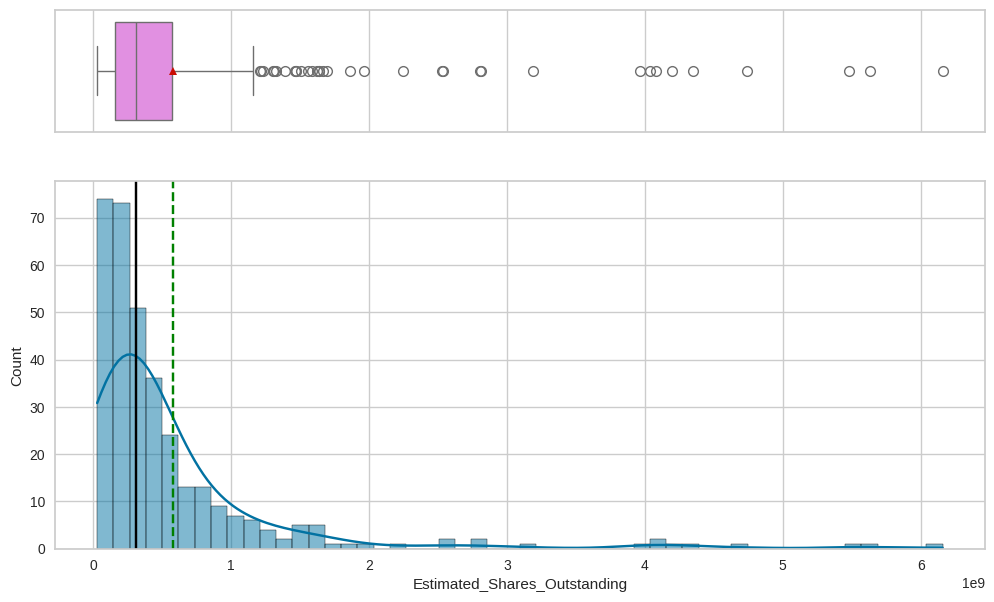

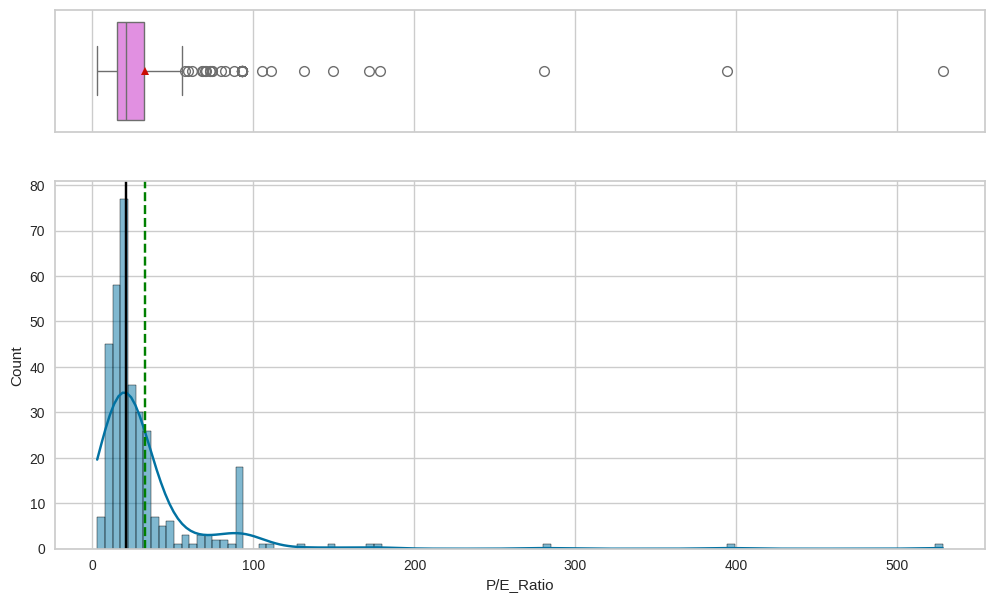

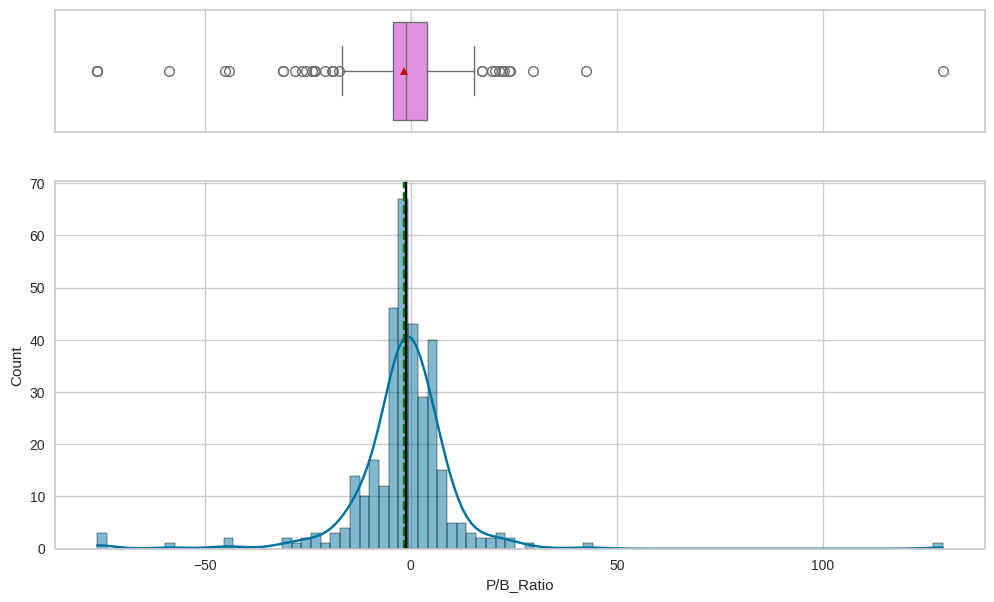

In [ ]:
col_num=df.select_dtypes(include='number')
for i in col_num:
  histogram_boxplot(df,i, kde=True)
  plt.show()


**Observation**

1. The histogram for current price, volatility ,ROE, Cash Ratio, Estimated shares Outstanding, P/E Ratio shows that the data is right skewed distribution.
2. The histogram for Price change, Net Cash Flow, Net Income, Earnings per share, P/B Ratio is normally distributed.
3. There are outliers present for every column.

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


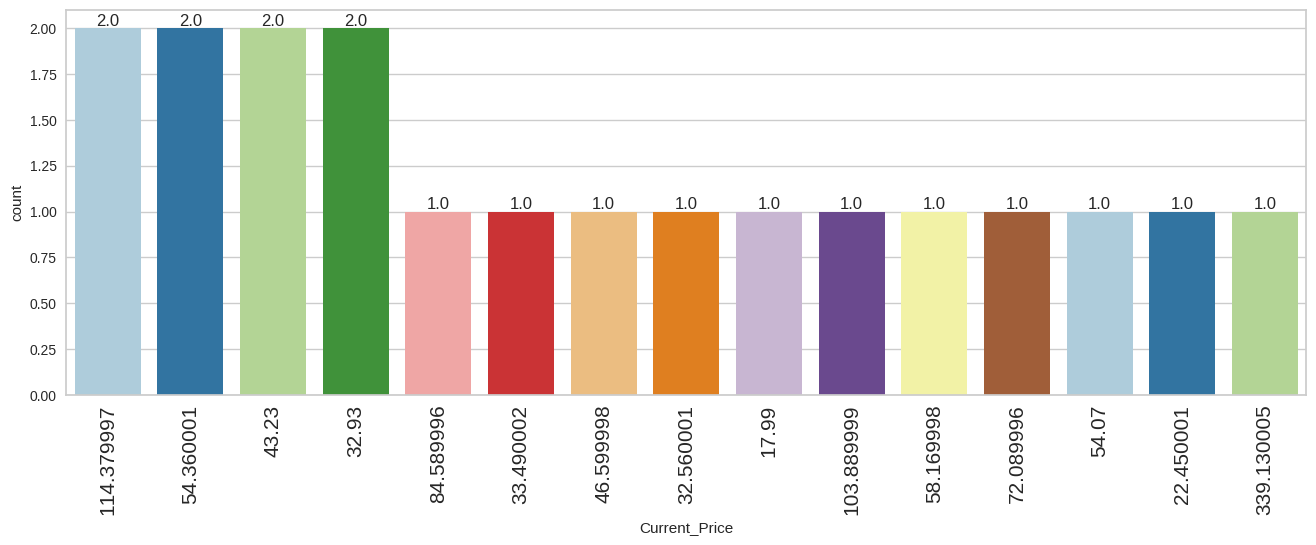

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


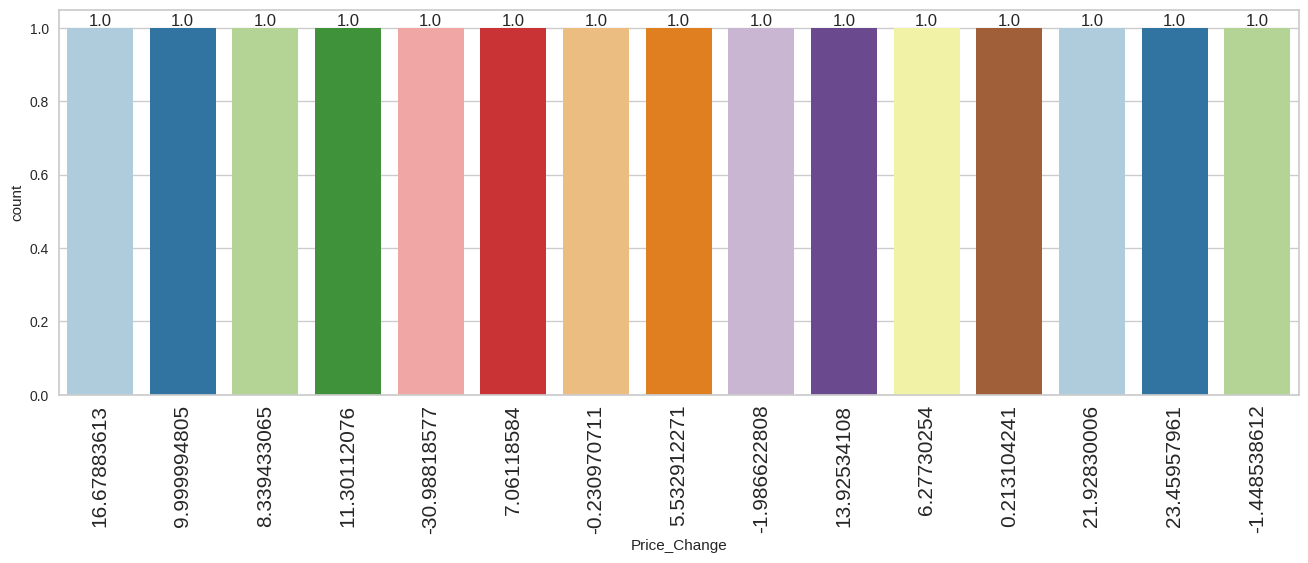

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


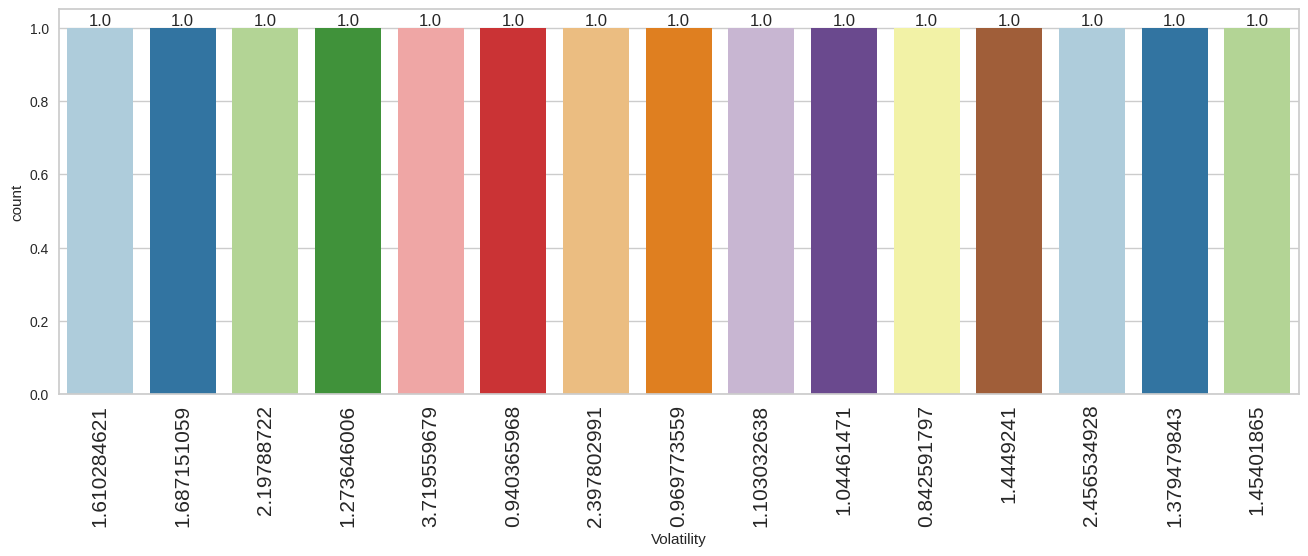

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


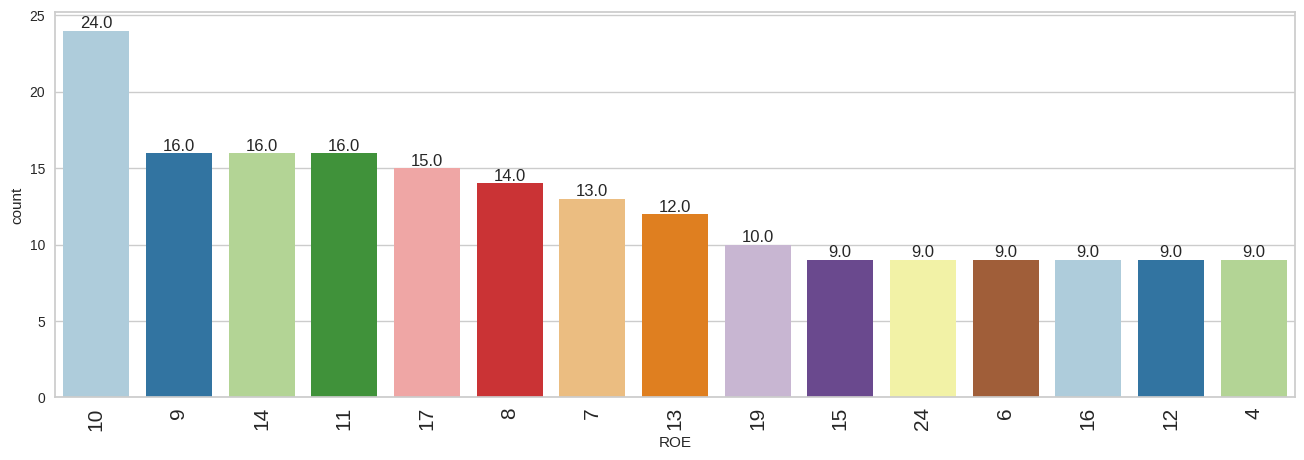

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


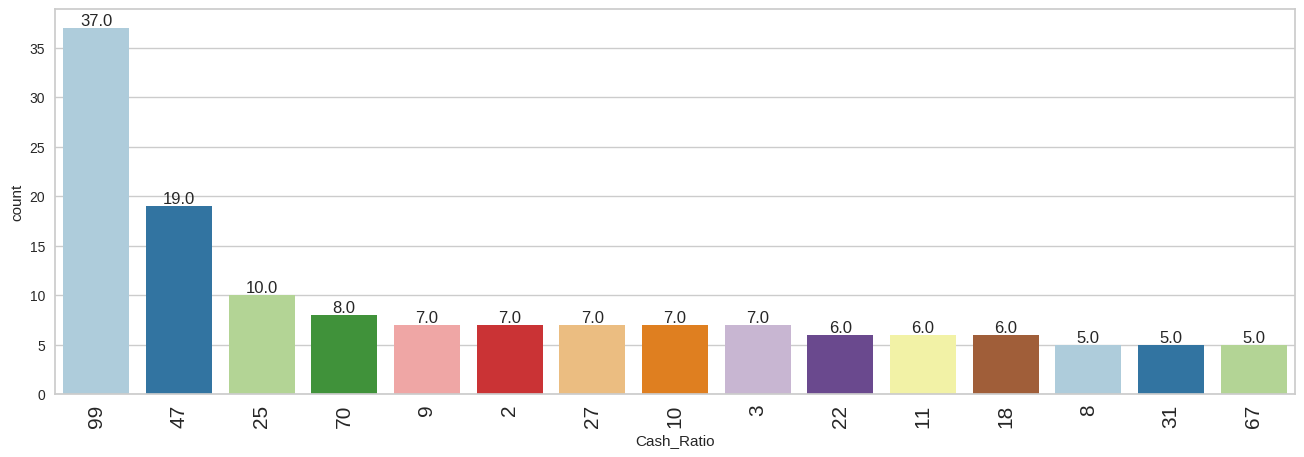

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


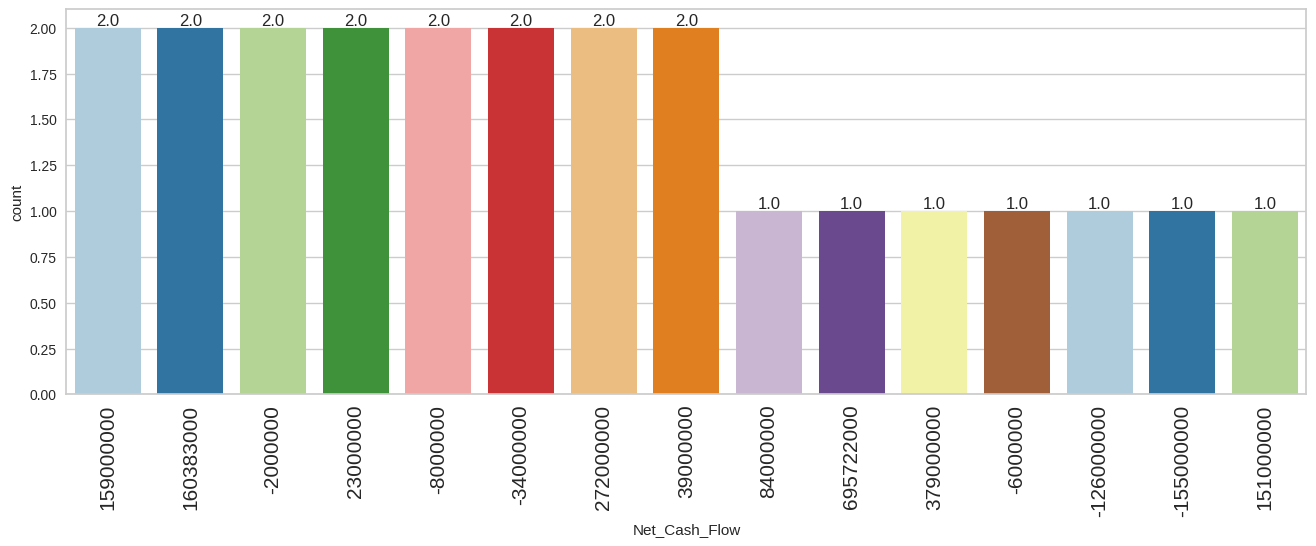

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


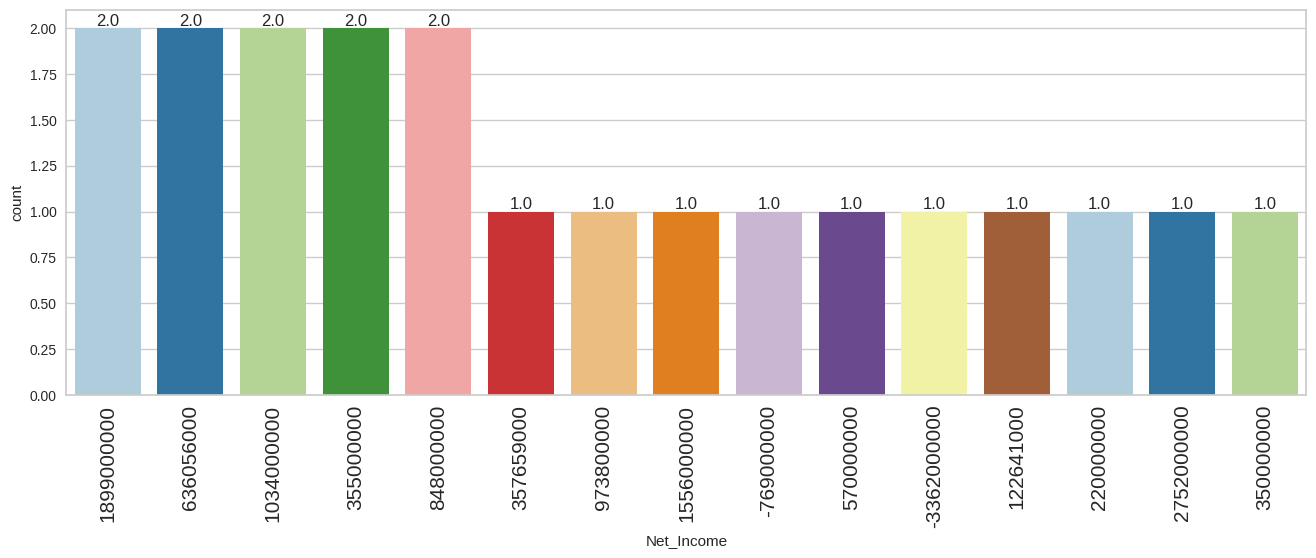

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


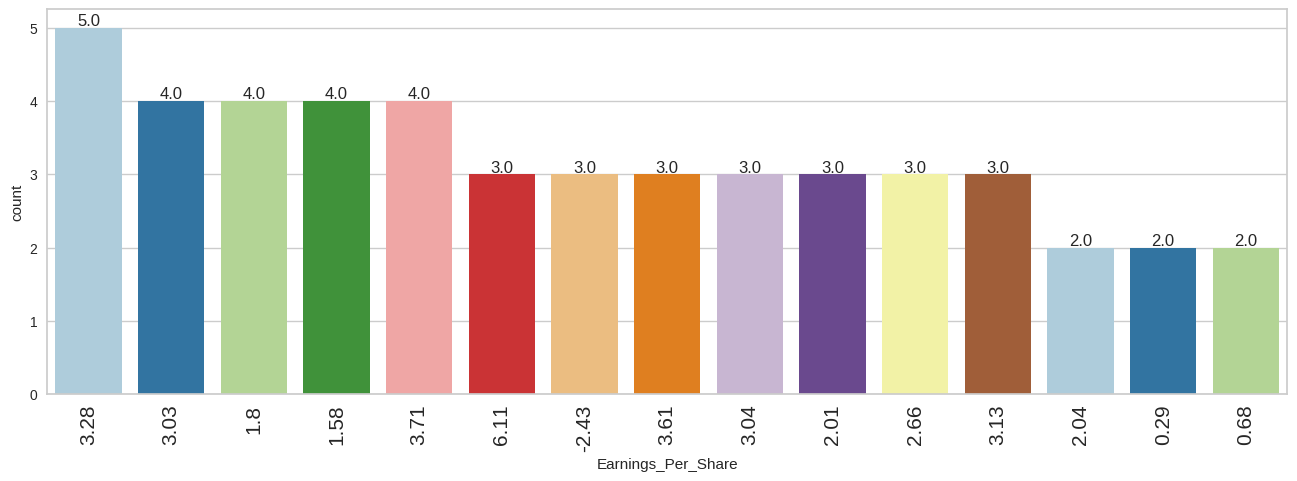

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


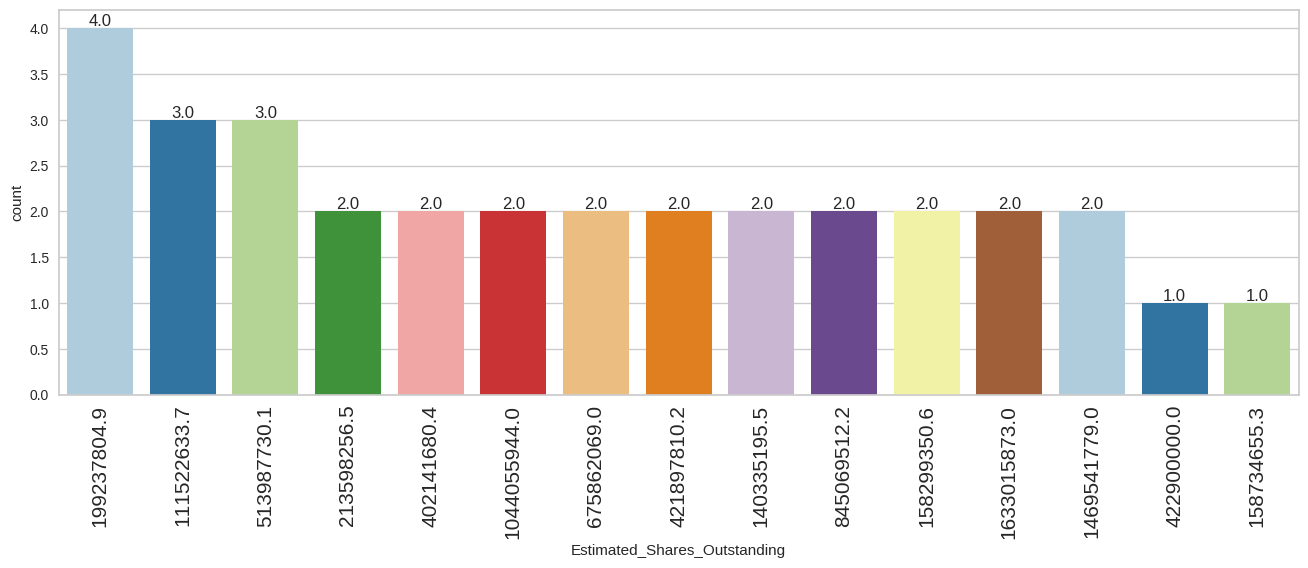

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


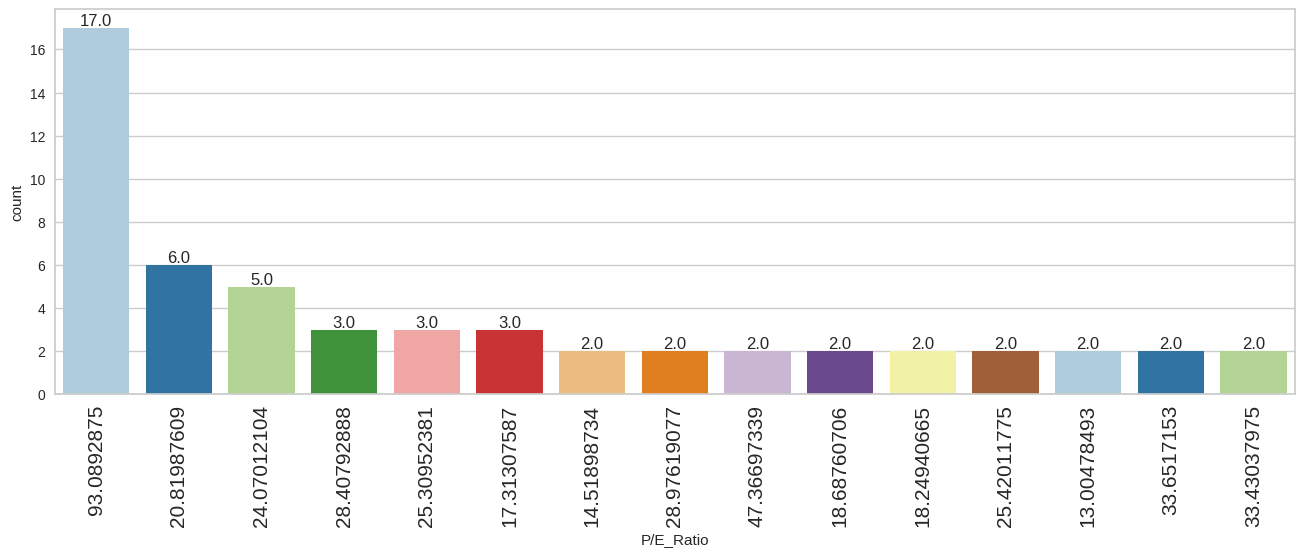

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


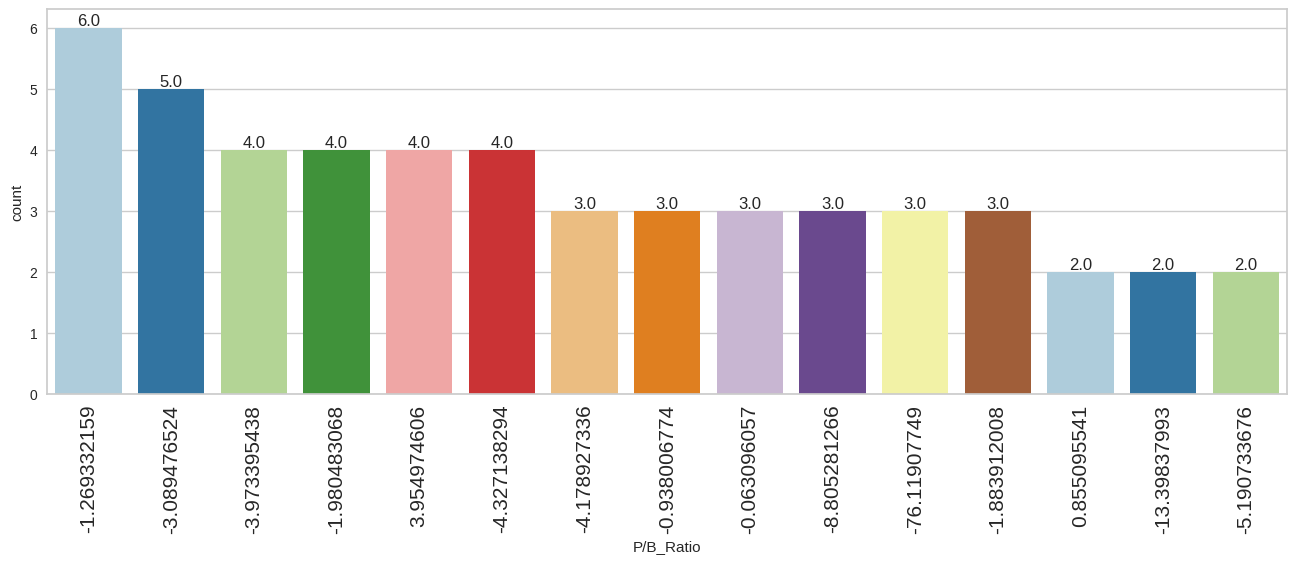

In [ ]:
for i in col_num:
  labeled_barplot(df,i, n=15)
  plt.show();

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


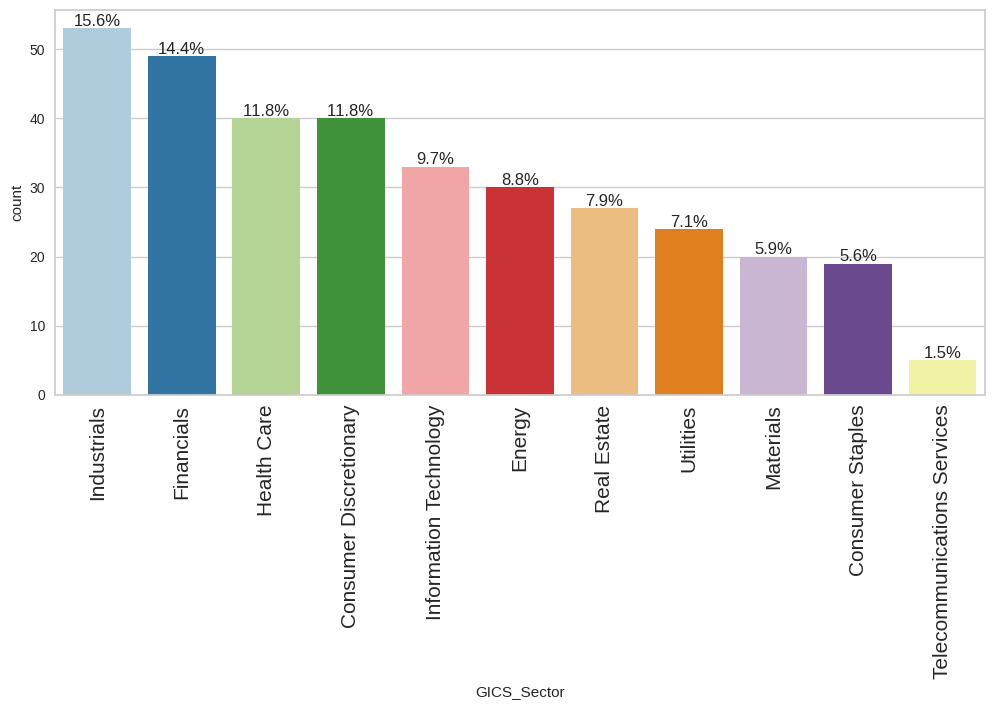

In [ ]:
labeled_barplot(df,'GICS_Sector', perc=True)
plt.show();

**Observation**

15.6% stocks are of Industrial sector; 14.4% are of Financial Sector; 11.8% of Health care and Consumer Discretionary; 9.7% of IT; 8.8% of energy and min stocks of 1.5% are of Telecommunications Services.

<ipython-input-19-31b9aa58915a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


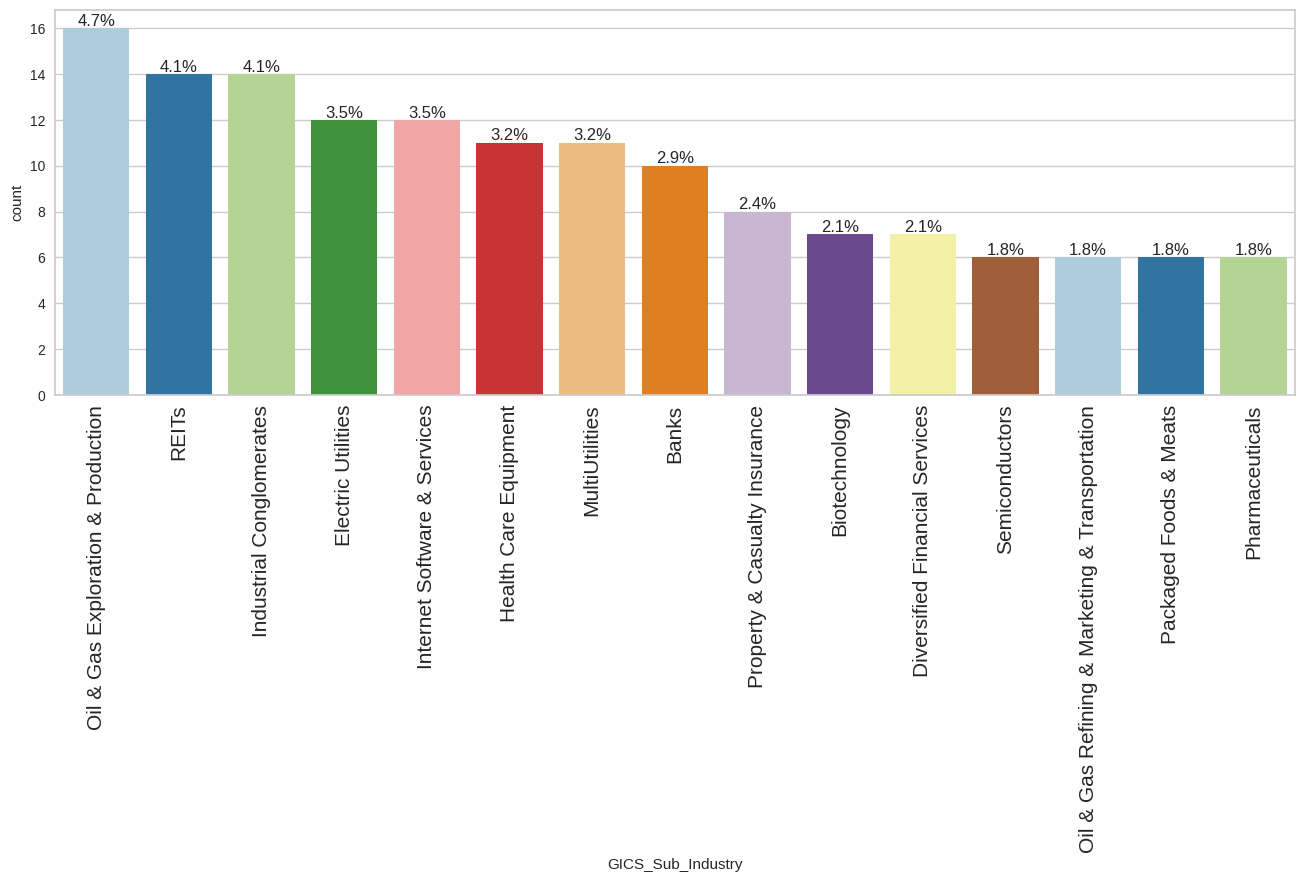

In [ ]:
labeled_barplot(df,'GICS_Sub_Industry', perc=True, n=15)
plt.show();

**Observation**

4.7% stocks are of Oil & Gas Exploration & Production Industry; 4.1% are of REIT and Industrial Conglomerates industry; 3.5% are of Electric Utilities and Internet Software & Services Industry and the minimum 1.8% stocks are of Pharmaceuticals, Packaged Foods & Meats, Oil & Gas Refining & Marketing & Transportation and Semiconductors Industry.

<Axes: >

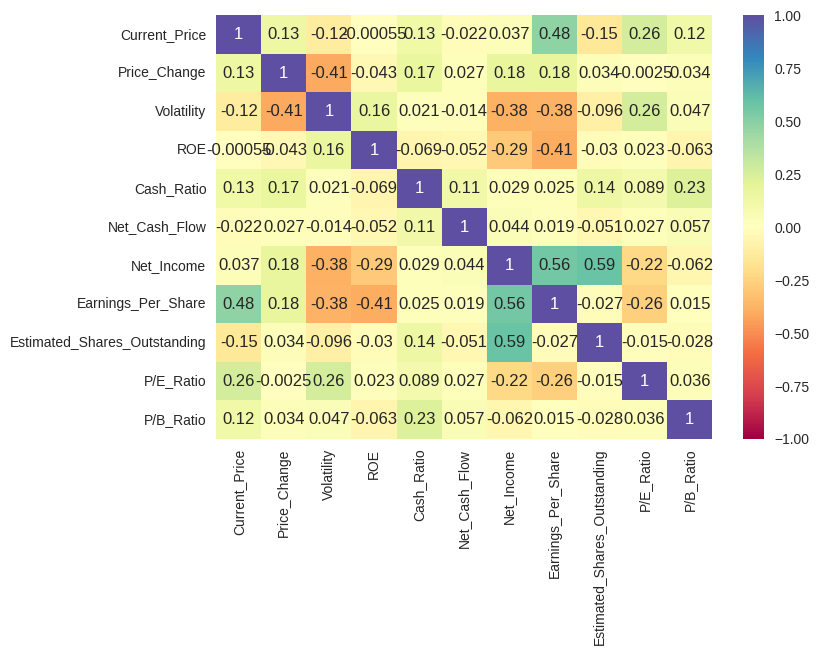

In [ ]:
sns.heatmap(col_num.corr(),annot=True, vmin=-1, vmax=1, cmap='Spectral')


**Observation**

There is not a strong positive correlation between two variables; however, the maximum positive correlation is between Net Income and Earnings Per share; Net Income and Estimated shares outstanding. There is a little negative correlation between Earnings per share and ROE.

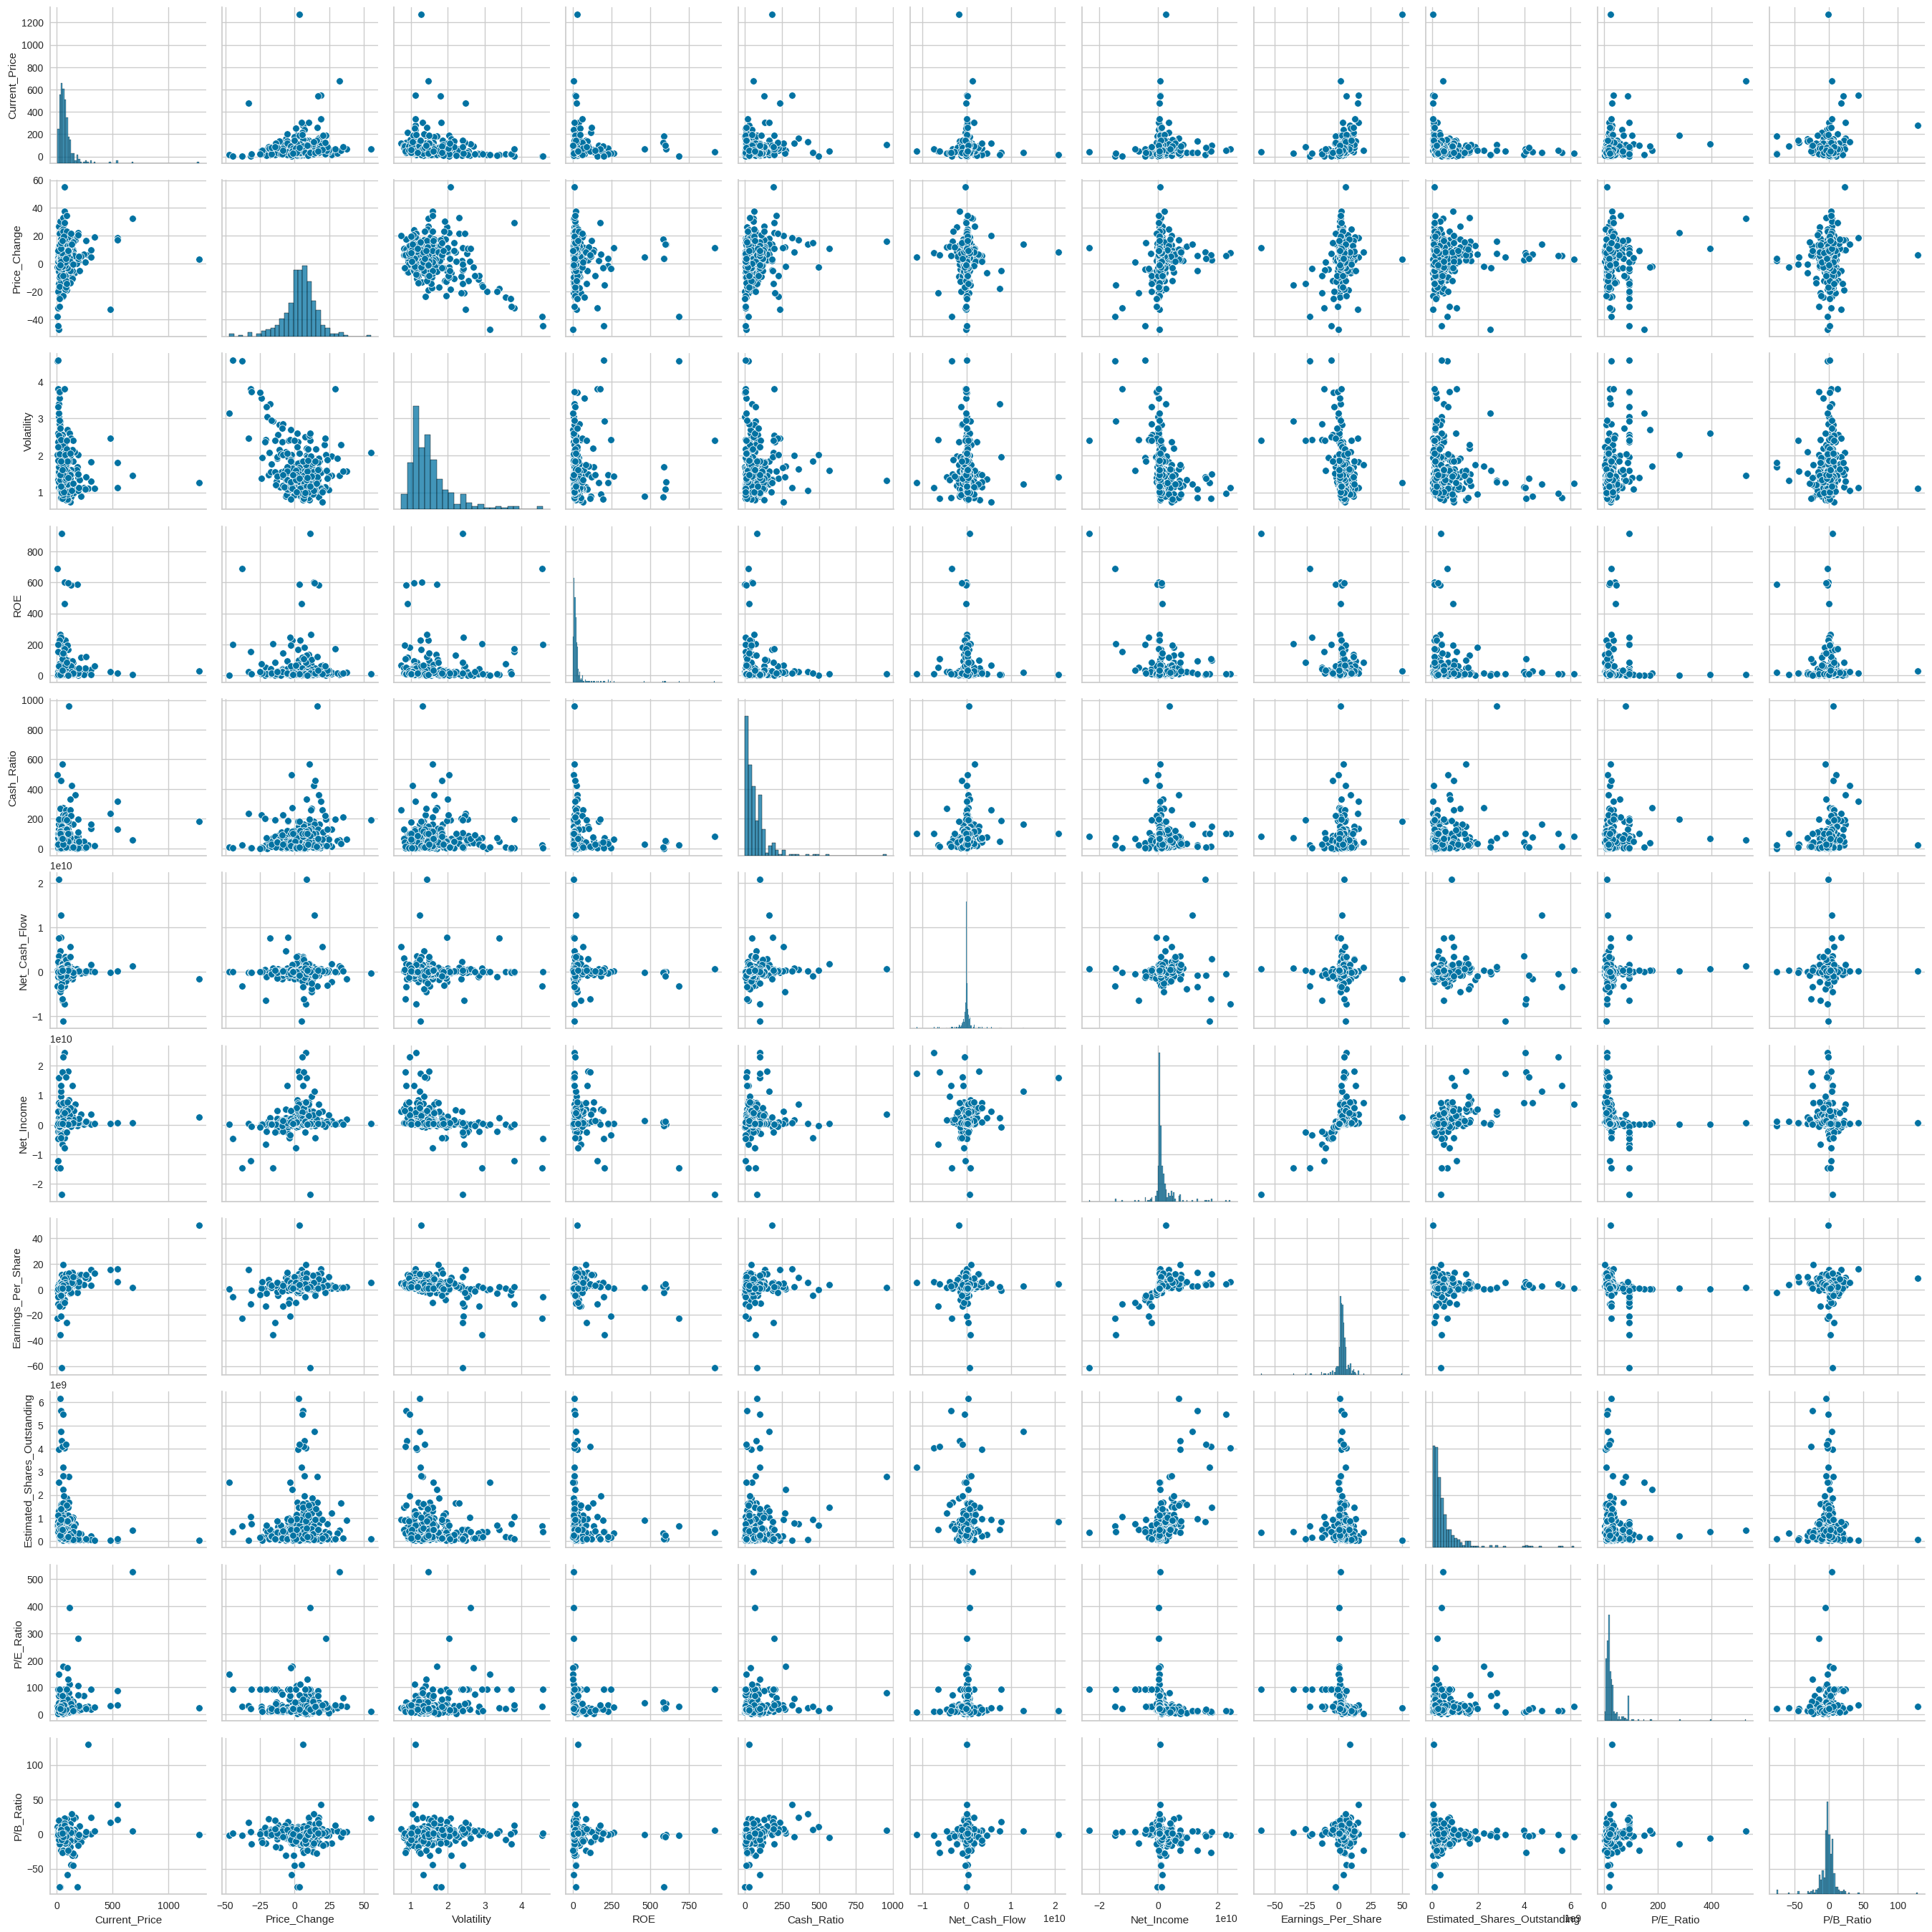

In [ ]:
sns.pairplot(df)
plt.show()

**Observation**

As per pair plot, there is not a strong linear relationship.

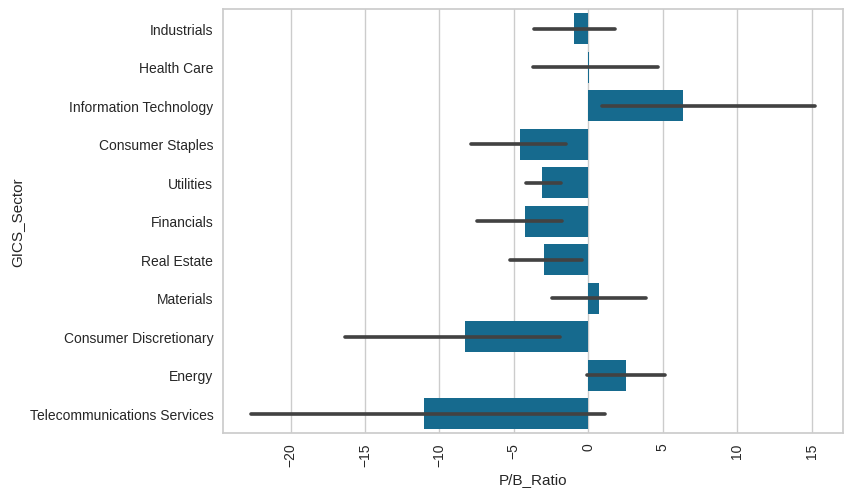

In [ ]:
sns.barplot(data=df, x='P/B_Ratio',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()

**Observation**

The mean P/B ratio is highest for IT sector followed by Energy sector. Other sectors have negative mean P/B Ratio with respect to GICS Sector.

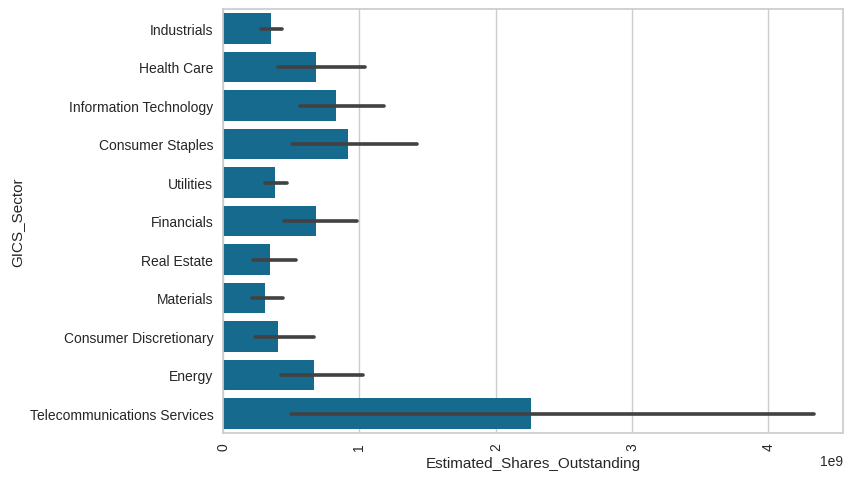

In [ ]:
sns.barplot(data=df, x='Estimated_Shares_Outstanding',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()

**Observation**

The mean estimated shares outstanding is highest for Telecommunications services followed by Consumer Staples and IT.

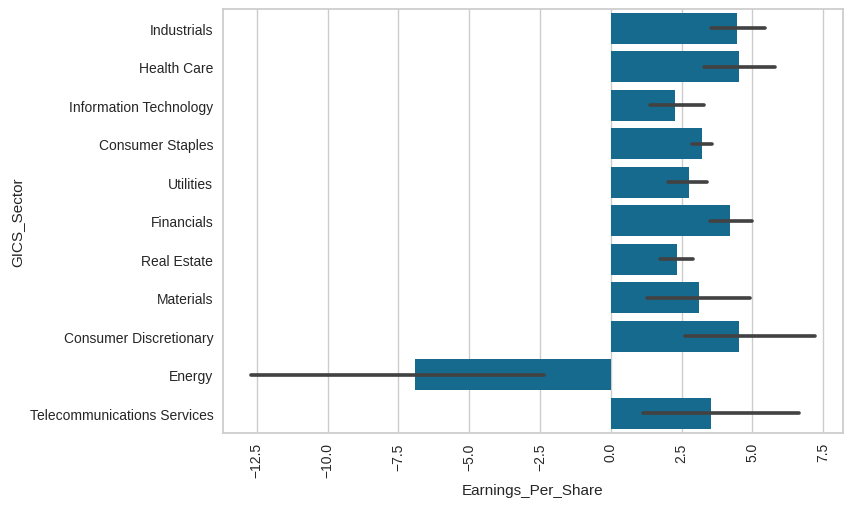

In [ ]:
sns.barplot(data=df, x='Earnings_Per_Share',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()


**Observation**

The mean earnings per share is highest and approximately equal for Industrials, Health care and Consumer Discretionary.

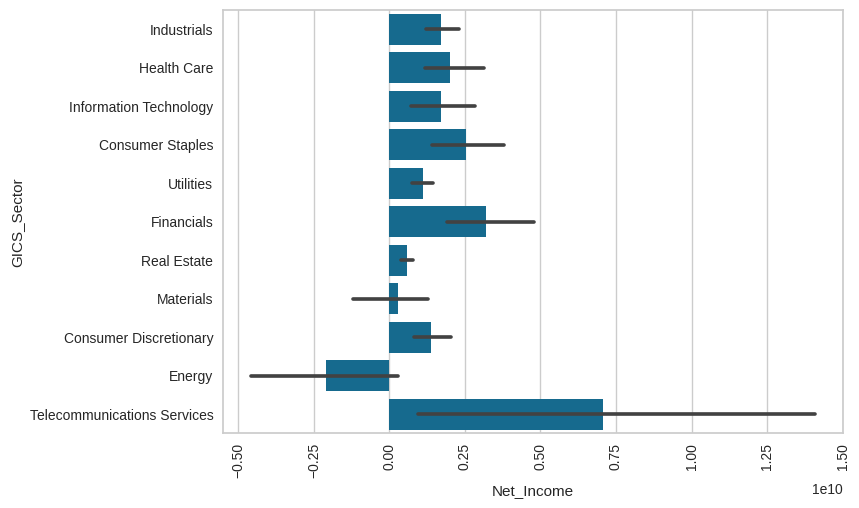

In [ ]:
sns.barplot(data=df, x='Net_Income',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()

**Observation**

The mean net income is highest for Telecommunications service followed by Financials and Consumer staples.

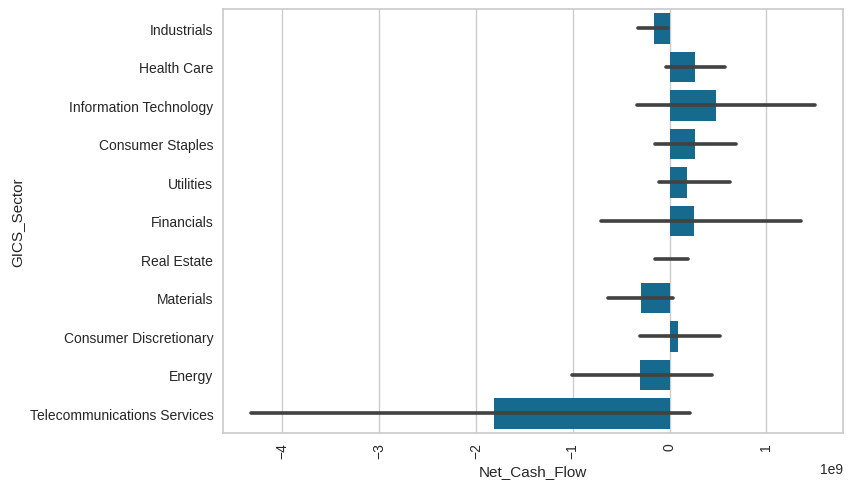

In [ ]:
sns.barplot(data=df, x='Net_Cash_Flow',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()


**Observation**

The mean net cash flow is highest for IT and negative for telecommunications services.

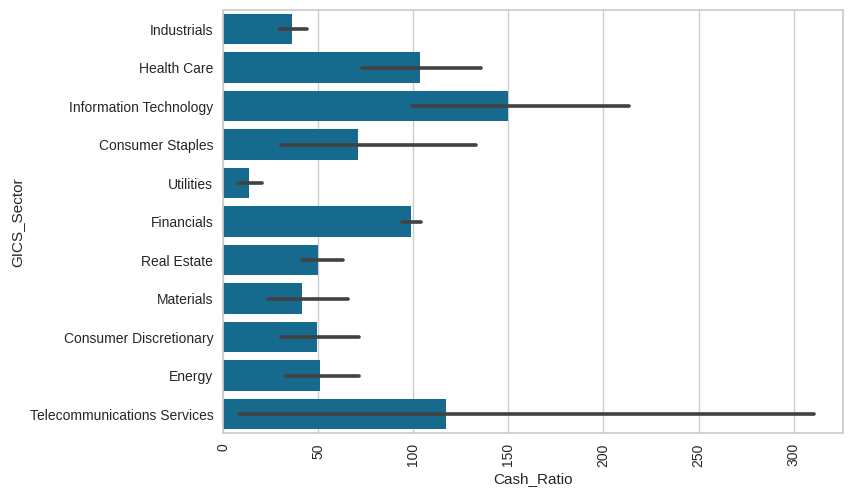

In [ ]:
sns.barplot(data=df, x='Cash_Ratio',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()


**Observation**

The mean cash ratio is highest for IT followed by telecommunication services and health care.

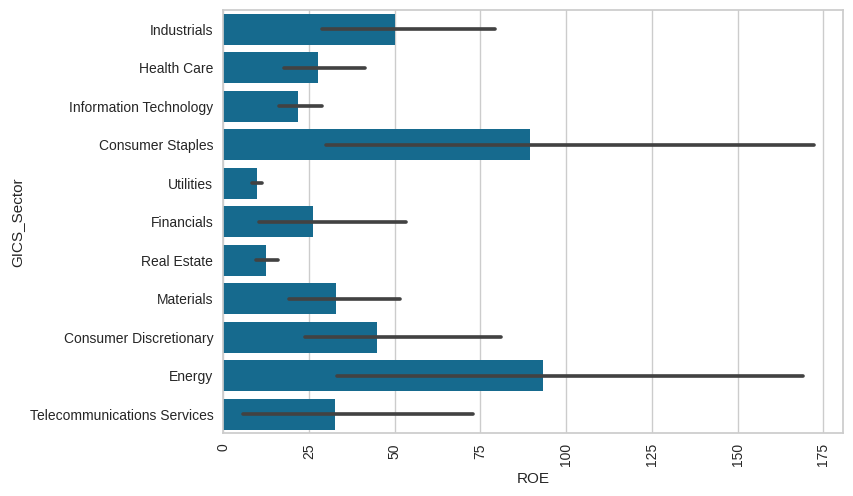

In [ ]:
sns.barplot(data=df, x='ROE',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()

**Observation**

The mean ROE is highest and approximately equal to Consumer staples and energy followed by Industrials.

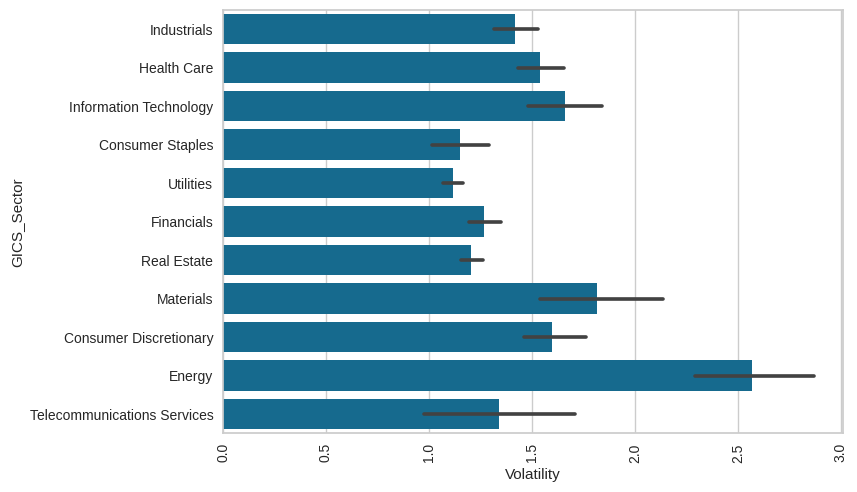

In [ ]:
sns.barplot(data=df, x='Volatility',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()

**Observation**

The mean volatility is highest for energy industry followed by materials and IT.

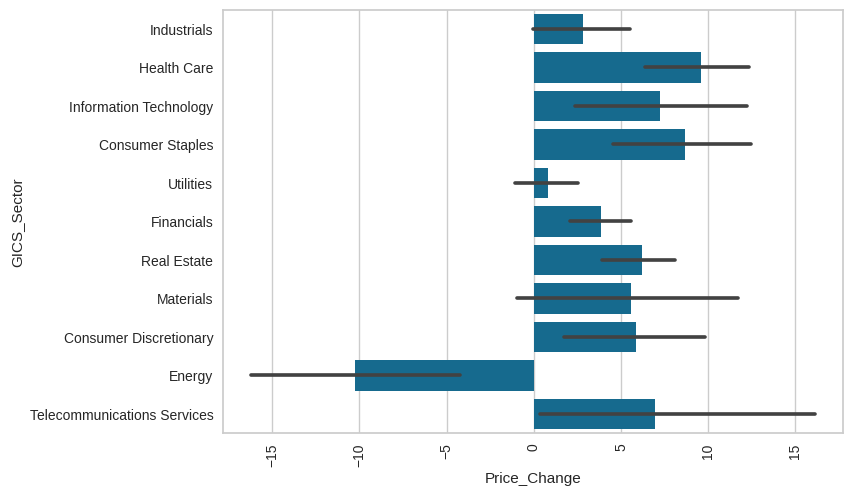

In [ ]:
sns.barplot(data=df, x='Price_Change',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()

**Observation**

The mean price change is highest for health care followed by consumer staples and IT.

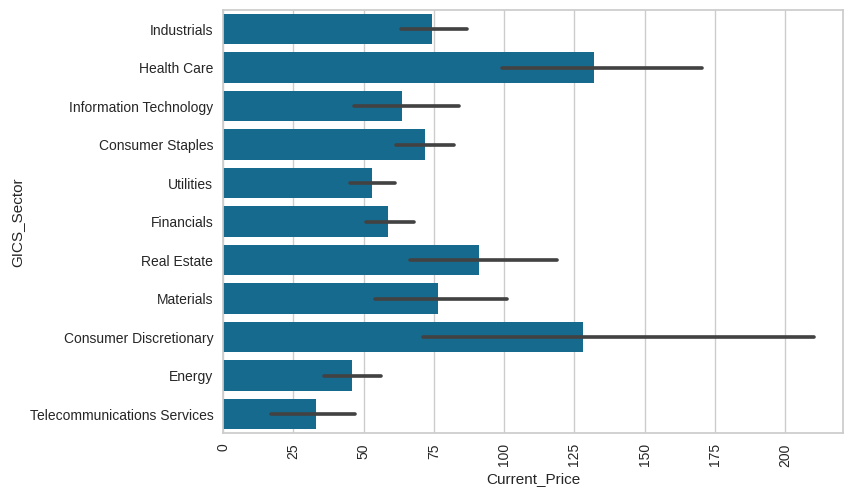

In [ ]:
sns.barplot(data=df, x='Current_Price',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()

**Observation**

The mean current price is highest for health care followed by consumer discretionary and real estate.

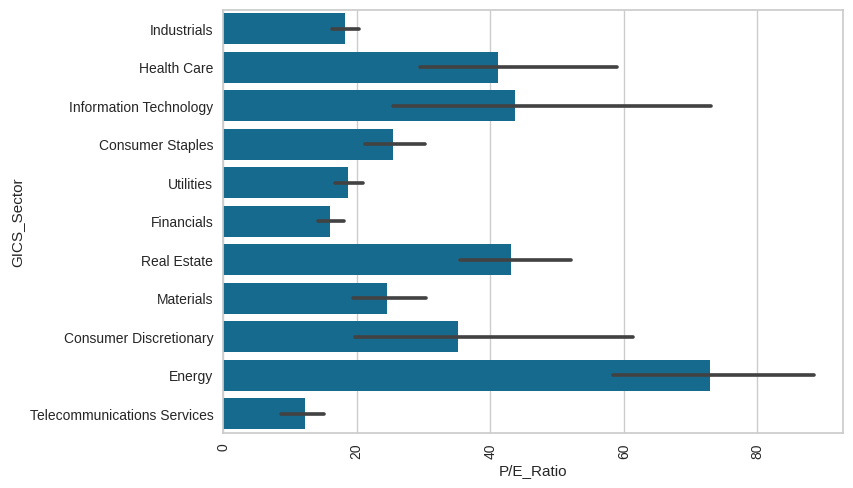

In [ ]:
sns.barplot(data=df, x='P/E_Ratio',y='GICS_Sector')
plt.xticks(rotation=90)
plt.show()

**Observation**

The mean P/E ratio is highest for energy industry followed by IT, Real estate and health care.

In [ ]:
df.groupby('GICS_Sector')['Current_Price'].mean().sort_values(ascending=False)

GICS_Sector
Health Care                    132.048250
Consumer Discretionary         128.095404
Real Estate                     90.976925
Materials                       76.551501
Industrials                     74.411807
Consumer Staples                71.972807
Information Technology          63.548485
Financials                      58.659183
Utilities                       52.968542
Energy                          46.042334
Telecommunications Services     32.964000
Name: Current_Price, dtype: float64

**Observation**

The mean current price is highest for health care industry with current price as 132.04 followed by consumer discretionary with current price as 128.09 and real estate with current price as 90.97.

In [ ]:
df.groupby('GICS_Sector')['Cash_Ratio'].mean().sort_values(ascending=False)

GICS_Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash_Ratio, dtype: float64

**Observation**

The mean cash ratio is highest for IT industry with cash ratio as 149.81 followed by telecommunications services with cash ratio as 117 and health care with cash ratio as 103.77

In [ ]:
df.groupby('GICS_Sector')['P/E_Ratio'].mean().sort_values(ascending=False)

GICS_Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E_Ratio, dtype: float64

**Observation**

The mean P/E ratio is highest for energy industry with P/E ratio of 72.8 followed by IT with P/E ratio of 43.78 and real estate with P/E ratio of 43.06.

In [ ]:
df.groupby('GICS_Sector')['GICS_Sub_Industry'].nunique().sort_values(ascending=False)

GICS_Sector
Consumer Discretionary         22
Industrials                    16
Financials                     13
Information Technology         12
Materials                      10
Health Care                     8
Consumer Staples                8
Real Estate                     6
Energy                          4
Utilities                       3
Telecommunications Services     2
Name: GICS_Sub_Industry, dtype: int64

**Observation**

There are 22 sub industries in Consumer Discretionary industry followed by 16 sub industries in Industrials and 13 in Financials. IT also 12 sub industries and the least 2 sub industry with telecommunications services.

**Data Preprocessing**

Duplicate value check

Missing value treatment

Outlier check

Feature engineering (if needed)

Any other preprocessing steps (if needed)

In [ ]:
data.isna().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

**Observation**

There is no missing value present in data set.

In [ ]:
data.duplicated().sum()

np.int64(0)

**Observation**

There is no duplicate values present in data set.

**EDA**

It is a good idea to explore the data once again after manipulating it.

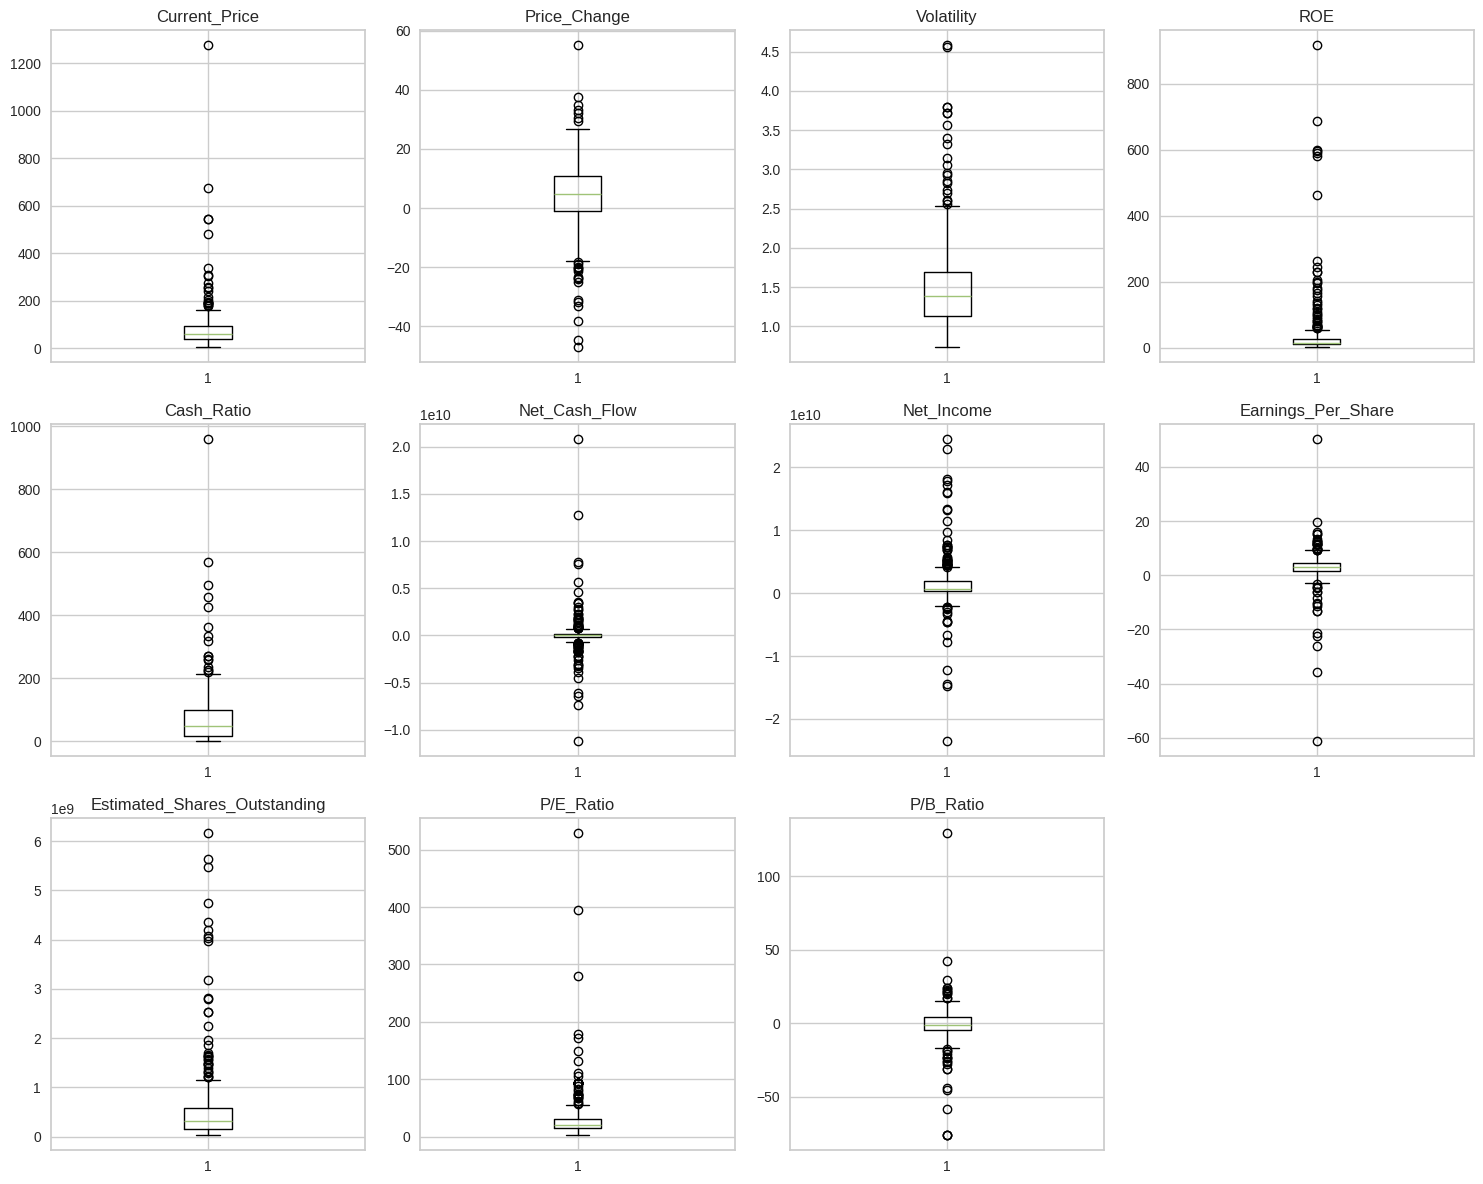

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation**

There are outliers present but they represent genuine values.

In [ ]:
col_num=df.select_dtypes(include='number')

In [ ]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = col_num.copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

**Observation**

Data is scaled for K means and Hierarchical clustering.

In [ ]:
subset_scaled_df.head()

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

**K-means Clustering**

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411
Number of Clusters: 9 	Average Distortion: 1.956222103389025


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

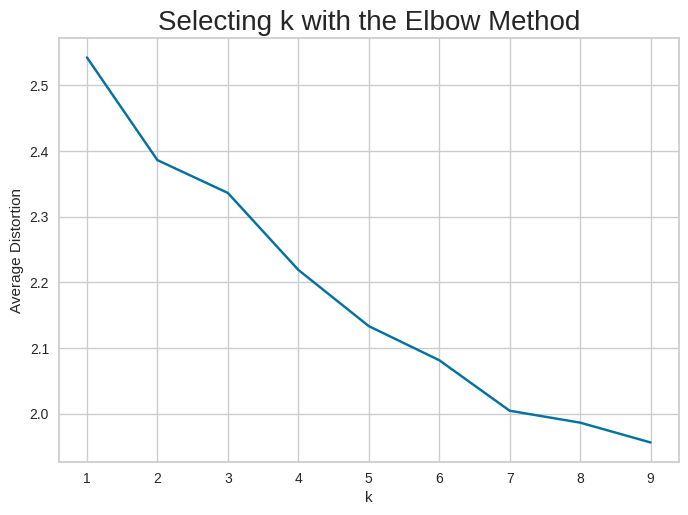

In [ ]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**Observation**

After K=4, the graph becomes constant. We will try to make clusters for different values of K as 4,5,6 and 7 and check the Silhouette Score.

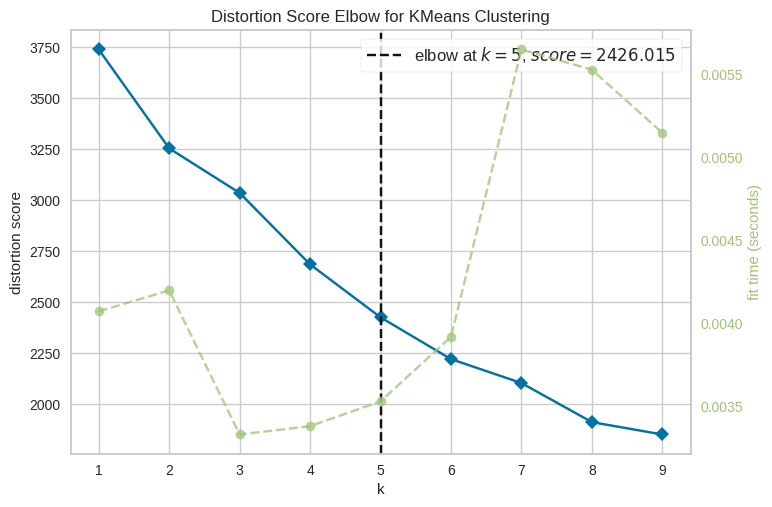

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

For n_clusters = 2, silhouette score is 0.45335782729503565
For n_clusters = 3, silhouette score is 0.40374060030338865
For n_clusters = 4, silhouette score is 0.4246430808437099
For n_clusters = 5, silhouette score is 0.4381539778147092
For n_clusters = 6, silhouette score is 0.40869599703024256
For n_clusters = 7, silhouette score is 0.1207450219233897
For n_clusters = 8, silhouette score is 0.3693991650696542
For n_clusters = 9, silhouette score is 0.35185096182499204


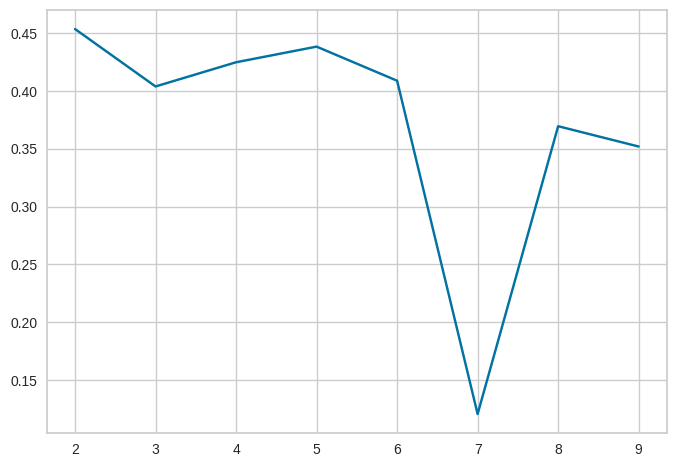

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**Observation**

The silhouette score is highest for K=5 followed by K=4 and K=6.

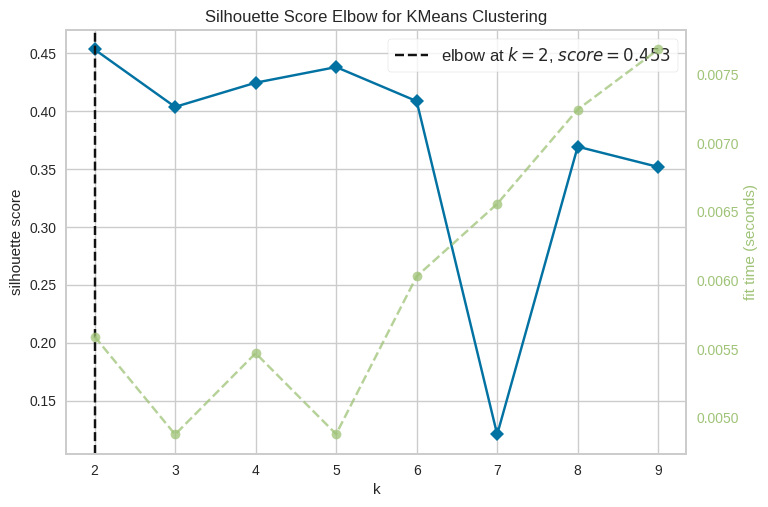

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette", timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

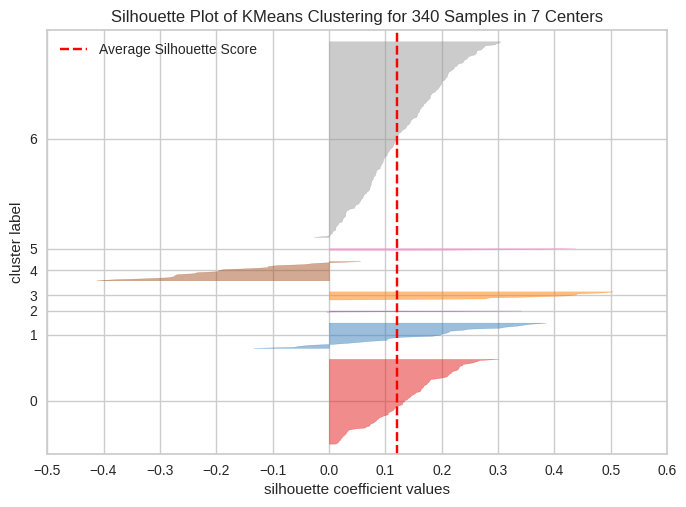

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

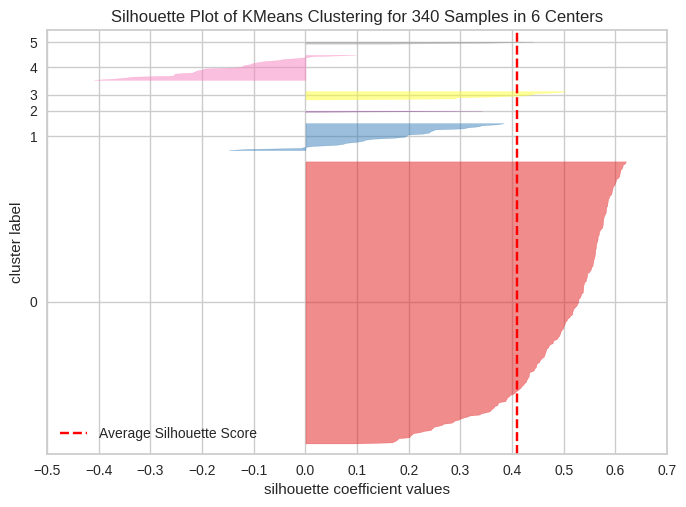

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

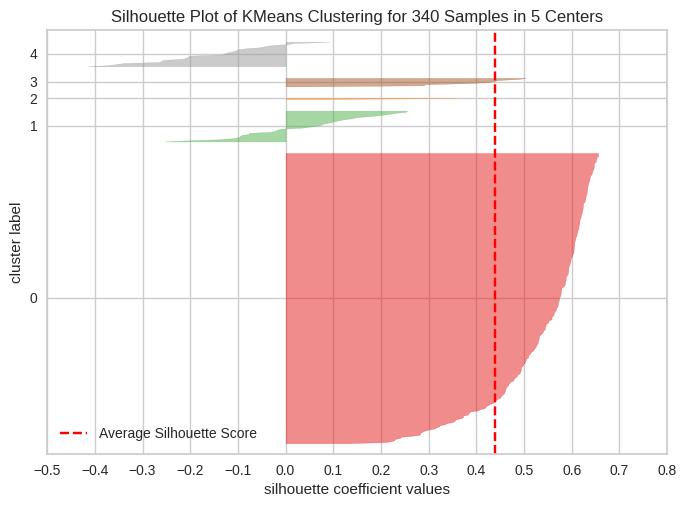

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

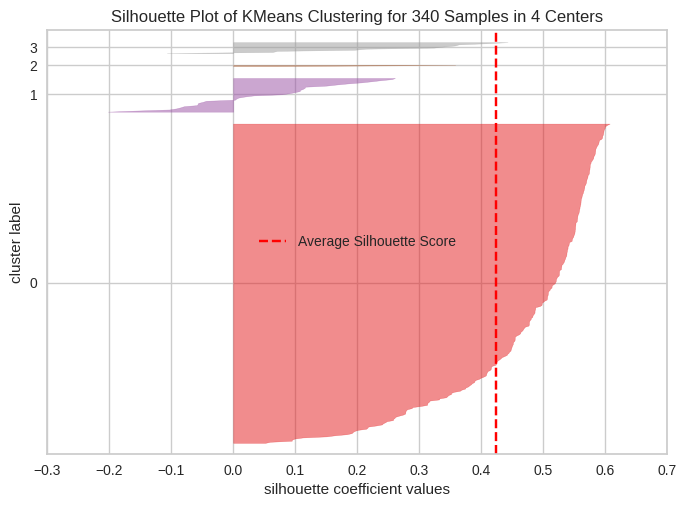

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**Observation**

After checking different silhouette scores and clusters, we will select no of clusters as 6 as final model.

**Select Final Model**

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=6, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

**Cluster Profiling**

In [ ]:
cluster_profile = df.select_dtypes(include='number').groupby("K_means_segments").mean()

In [ ]:
cluster_profile

Current_Price  Price_Change  Volatility         ROE  \
K_means_segments                                                        
0                     73.333434      4.981094    1.382148   35.025735   
1                     35.165385    -16.390175    2.922214  110.961538   
2                    150.035733     12.409390    1.776840   26.080000   
3                     48.103077      6.053507    1.163964   27.538462   
4                   1274.949951      3.190527    1.268340   29.000000   
5                    327.006671     21.917380    2.029752    4.000000   

                  Cash_Ratio  Net_Cash_Flow    Net_Income  Earnings_Per_Share  \
K_means_segments                                                                
0                  50.393382  -3.392882e+06  1.488754e+09            3.700864   
1                  49.461538  -1.923189e+08 -4.041692e+09           -9.849231   
2                 292.360000   5.732244e+08  8.530313e+08            3.588400   
3                  77.230769   7.732308e+08  1.411492e+10            3.958462   
4                 184.000000  -1.671386e+09  2.551360e+09           50.090000   
5                 106.000000   6.982407e+08  2.875470e+08            0.750000   

                  Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  
K_means_segments                                                       
0                                 4.244186e+08   23.599532  -3.504136  
1                                 4.826101e+08   78.934814   1.612922  
2                                 6.442052e+08   47.167939  15.971922  
3                                 3.918735e+09   16.098039  -4.253404  
4                                 5.093552e+07   25.453183  -1.052429  
5                                 3.667632e+08  400.989188  -5.322376

**Observation**

Cluster 0 has 272 points, cluster 1 has 26 points, cluster 2 has 25 points, cluster 3 has 13 points, cluster 4 has 1 point and cluster 5 has 3 points.

In [ ]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["GICS_Sector"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

**Observation**

1. The maximum current price of 1274.94, earnings per share of 50.09 is present in cluster 4.
2. The maxuimum price change of 21.91 and P/E ratio of 400.98 is present in cluster 5.
3. The maximum volatility of 2.92 and ROE of 110.96 is present in cluster 1.
4. The maximum cash ratio of 292.36 and P/B ratio of 15.97 is present in cluster 2.
5. The maximum net cash flow, net income and estimated shares outstanding is present in cluster 3.

In [ ]:
## Code to print the companies in each cluster
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["K_means_segments"] == cl]["GICS_Sector"].unique())
    print()

In cluster 0, the following companies are present:
['Industrials' 'Health Care' 'Consumer Staples' 'Utilities' 'Financials'
 'Real Estate' 'Information Technology' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']

In cluster 2, the following companies are present:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Real Estate' 'Telecommunications Services' 'Energy' 'Consumer Staples'
 'Materials']

In cluster 5, the following companies are present:
['Health Care' 'Consumer Discretionary' 'Information Technology']

In cluster 1, the following companies are present:
['Energy' 'Materials' 'Information Technology' 'Industrials']

In cluster 3, the following companies are present:
['Financials' 'Consumer Discretionary' 'Health Care'
 'Information Technology' 'Consumer Staples' 'Telecommunications Services'
 'Energy']

In cluster 4, the following companies are present:
['Consumer Discretionary']



**Observation**

Cluster 0 has Industrials, Health Care, Consumer Staples, Utilities, Financials,Real Estate, Information Technology, Materials, Consumer Discretionary, Telecommunications Services, Energy Sectors

Cluster 2 has Information Technology, Health Care, Consumer Discretionary, Real Estate, Telecommunications, Services, Energy, Consumer Staples,Materials sectors present.

Cluster 5 has health care, consumer discretionary and IT sectors present.

Cluster 1 has Energy, Materials, Information Technology, Industrials Sectors present. Cluster 3 has Financials, Consumer Discretionary, Health Care, Information Technology, Consumer Staples,Telecommunications Services, Energy sectors present. Cluster 4 has Consumer Discretionary sector present.

In [ ]:
df.groupby('K_means_segments')['GICS_Sector'].count()

K_means_segments
0    272
1     26
2     25
3     13
4      1
5      3
Name: GICS_Sector, dtype: int64

**Observation**

Cluster 0 has 272 points, cluster 1 has 26 points, cluster 2 has 25 points, cluster 3 has 13 points, cluster 4 has 1 point and cluster 5 has 3 points.

In [ ]:
df.groupby('K_means_segments')['GICS_Sector'].value_counts()

K_means_segments  GICS_Sector                
0                 Industrials                    52
                  Financials                     45
                  Consumer Discretionary         33
                  Health Care                    29
                  Real Estate                    26
                  Utilities                      24
                  Information Technology         20
                  Materials                      18
                  Consumer Staples               17
                  Energy                          6
                  Telecommunications Services     2
1                 Energy                         22
                  Information Technology          2
                  Industrials                     1
                  Materials                       1
2                 Information Technology          9
                  Health Care                     7
                  Consumer Discretionary          4
                  Consumer Staples                1
                  Energy                          1
                  Materials                       1
                  Real Estate                     1
                  Telecommunications Services     1
3                 Financials                      4
                  Health Care                     3
                  Telecommunications Services     2
                  Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Information Technology          1
4                 Consumer Discretionary          1
5                 Consumer Discretionary          1
                  Health Care                     1
                  Information Technology          1
Name: count, dtype: int64

**Observation**

1. Cluster 0 has highest 52 Industrials sector present followed by 45 financials and 33 consumer discretionary.
2. Cluster 1 has 22 energy sector present followed by 2 IT sector.
3. Cluster 2 has 9 IT sector present followed by 7 health care.
4. Cluster 3 has highest 4 financials sector present followed by 3 health care.
5. Cluster 4 has only 1 consumer discretionary sector present.
6. Cluster 5 has each 1 consumer discretionary, health care and IT sector present.

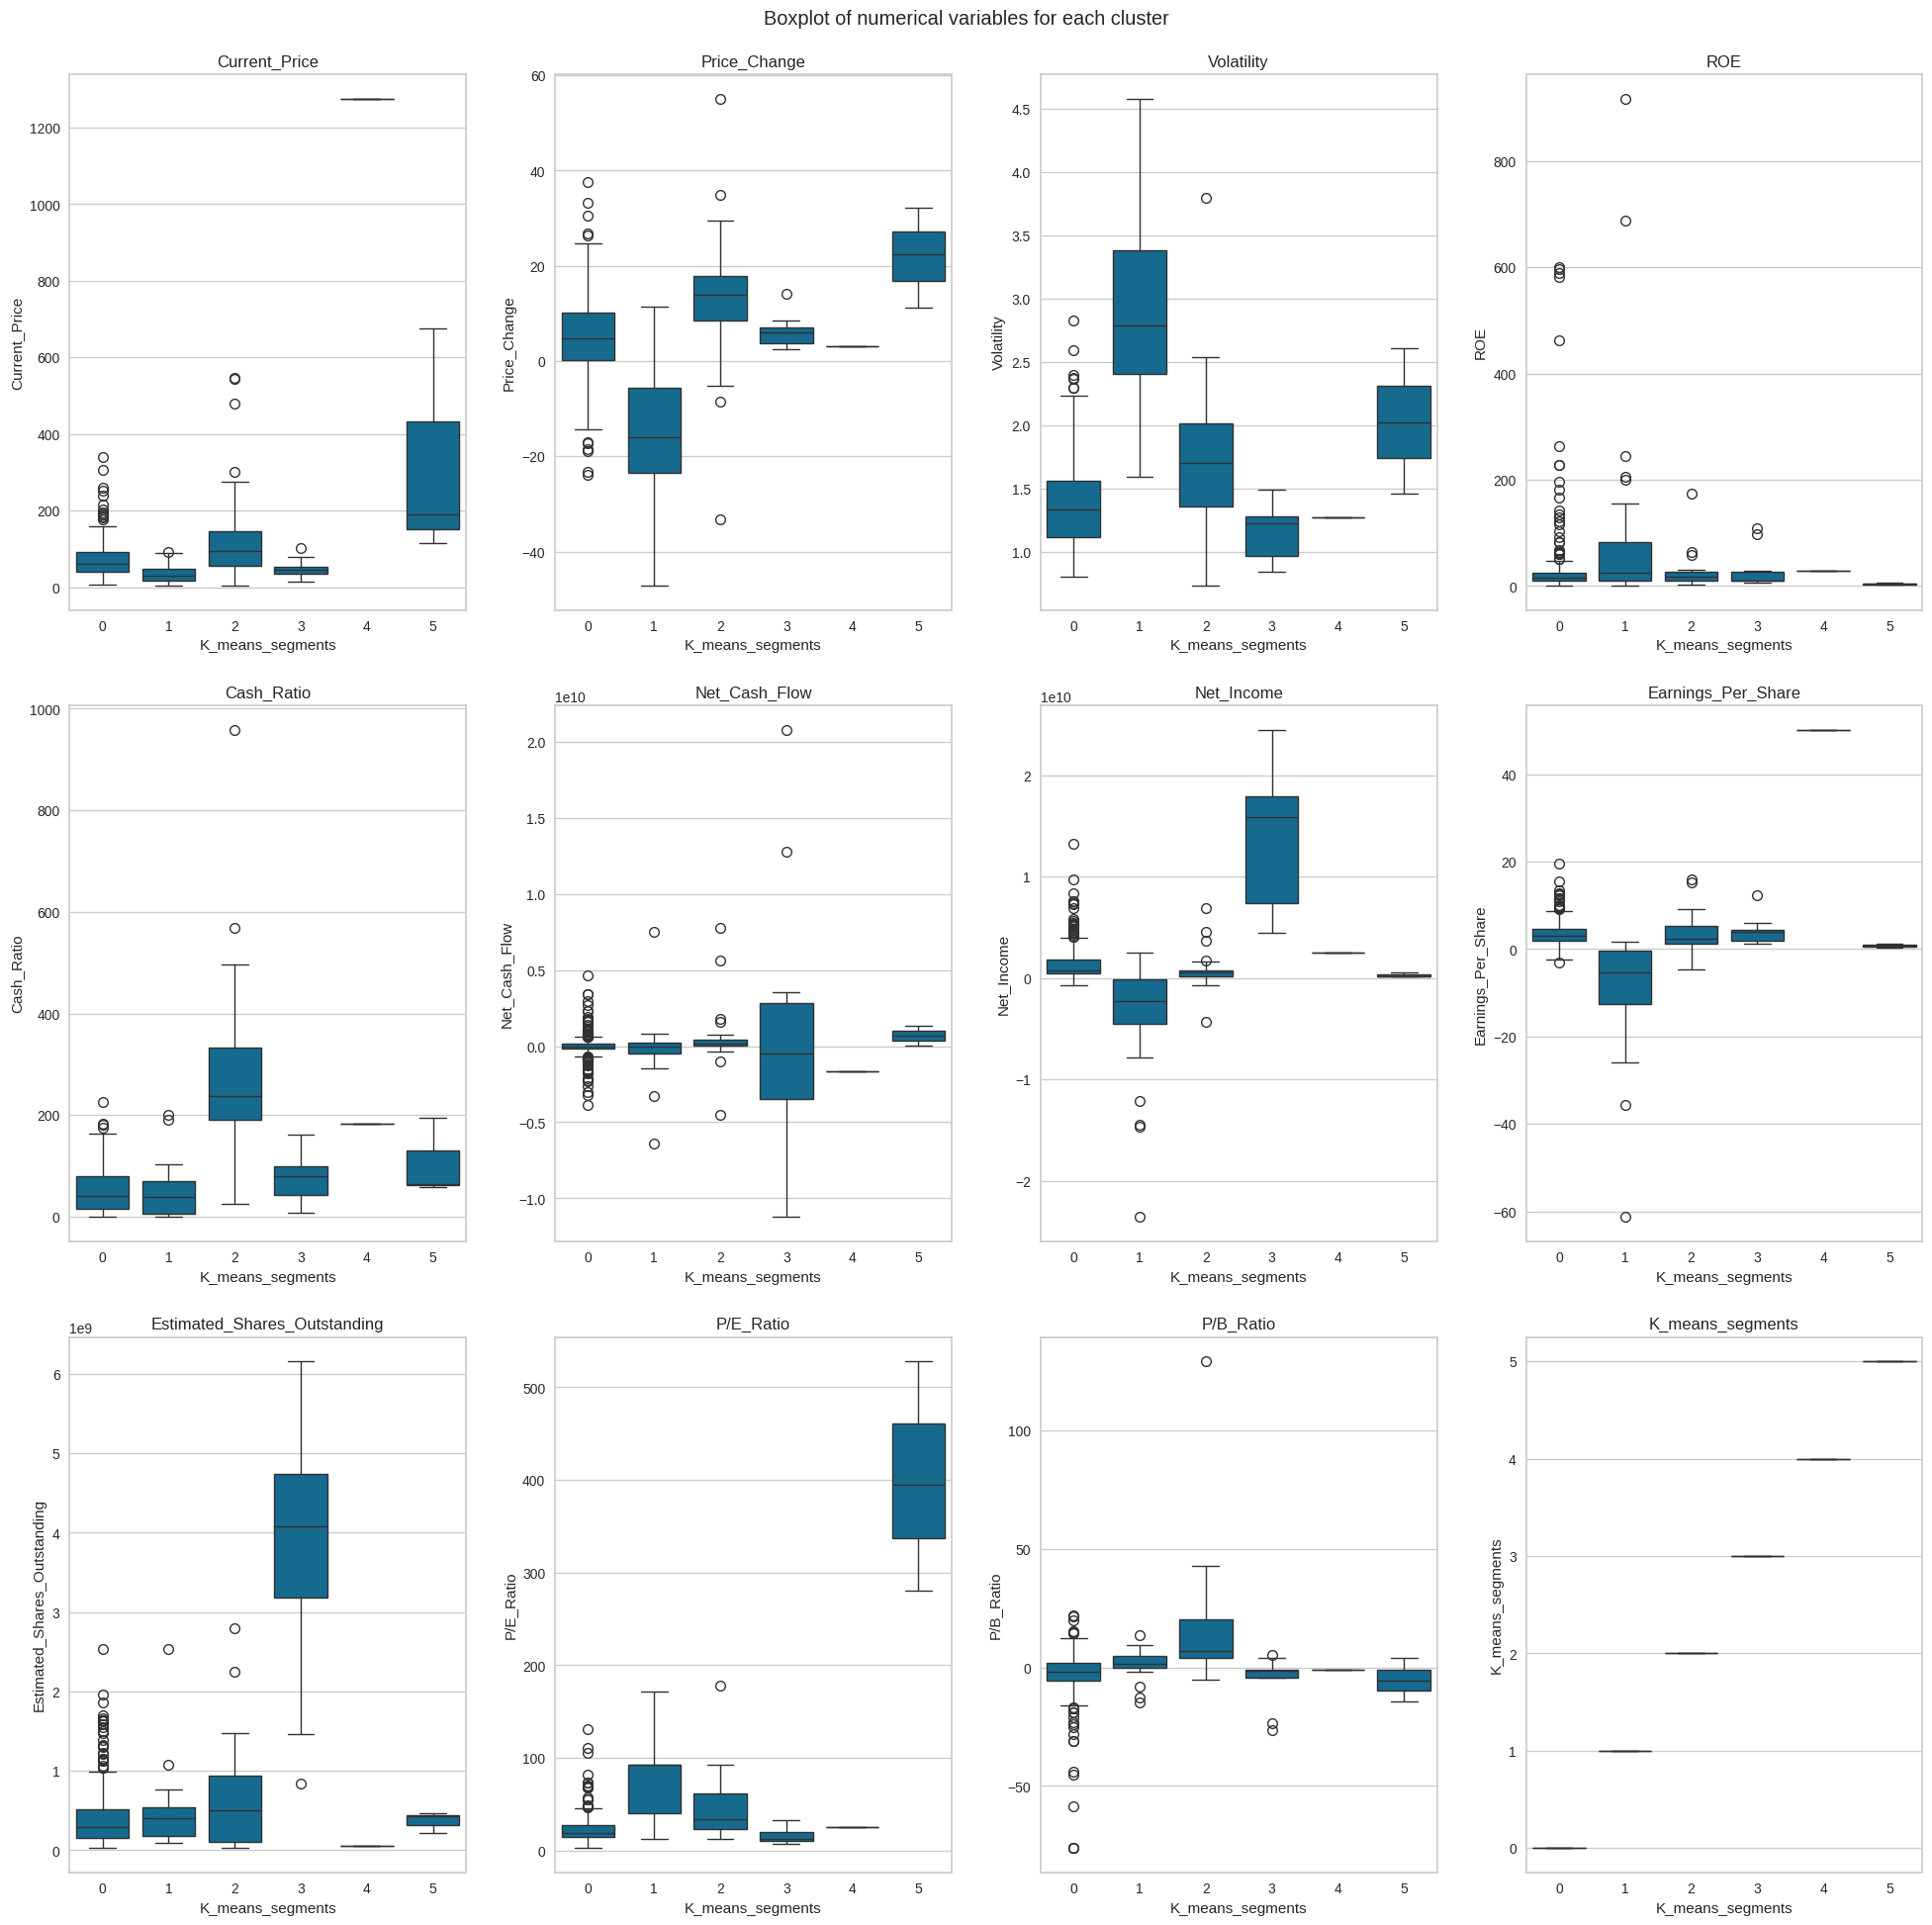

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
col_num = df.select_dtypes(include=np.number).columns.tolist()

# Adjust the subplot grid to accommodate all variables
num_rows = (len(col_num) + 3) // 4  # Calculate the number of rows needed
num_cols = 4

for i, variable in enumerate(col_num):
    plt.subplot(num_rows,num_cols, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)
    plt.title(variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_means_segments'>

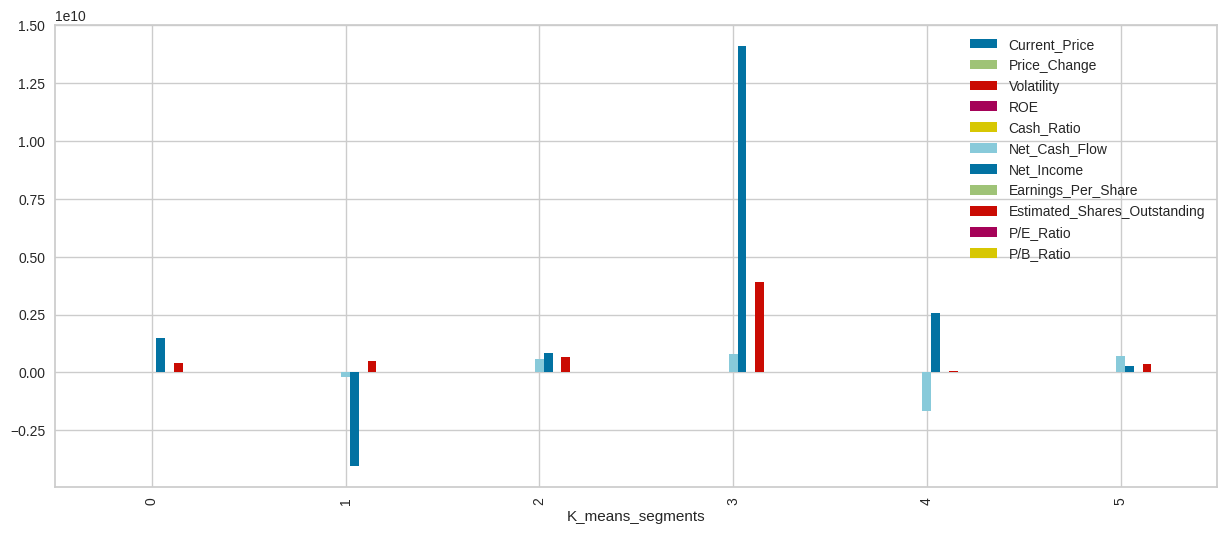

In [ ]:
df.select_dtypes(include='number').groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

**Observation**

**Cluster 0:** The Sectors included in cluster 0 only focus on net income and estimated shares outstanding. Net income is more focused as compared to estimated shares outstanding in cluster 0.

**Cluster 1:** Net income is negative. So companies should not focus on net income in cluster 1. Estimated shares outstanding has positive impact as compared to net cash flow.

**Cluster 2:** Net income, net cash flow and estimated shares outstanding has positive impact for companies in cluster 2.

**Cluster 3:** Sectors in cluster 3 should focus in net income followed by estimated shares outstanding and net cash flow.

**Cluster 4:** Net cash flow is negative in cluster 4 but net income is positive. Companies or investors should focus on net income.

**Cluster 5:** Net cash flow, net income and estimated shares outstanding is positive.

**Hierarchical Clustering**

**Checking Cophenetic Correlation**

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Observation**

Here cophenetic coefficient with different linkage method is calculated.

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Observation**

The highest cophenetic correlation is 0.942 and it is obtained with Euclidean distance and average linkage.

**Now will explore different linkage methods using Euclidean distance**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Observation**

Again we have checked cophenetic correlation with Euclidean distance for different linkage method and it is highest with average linkage method.

**Checking dendograms for different linkage methods**

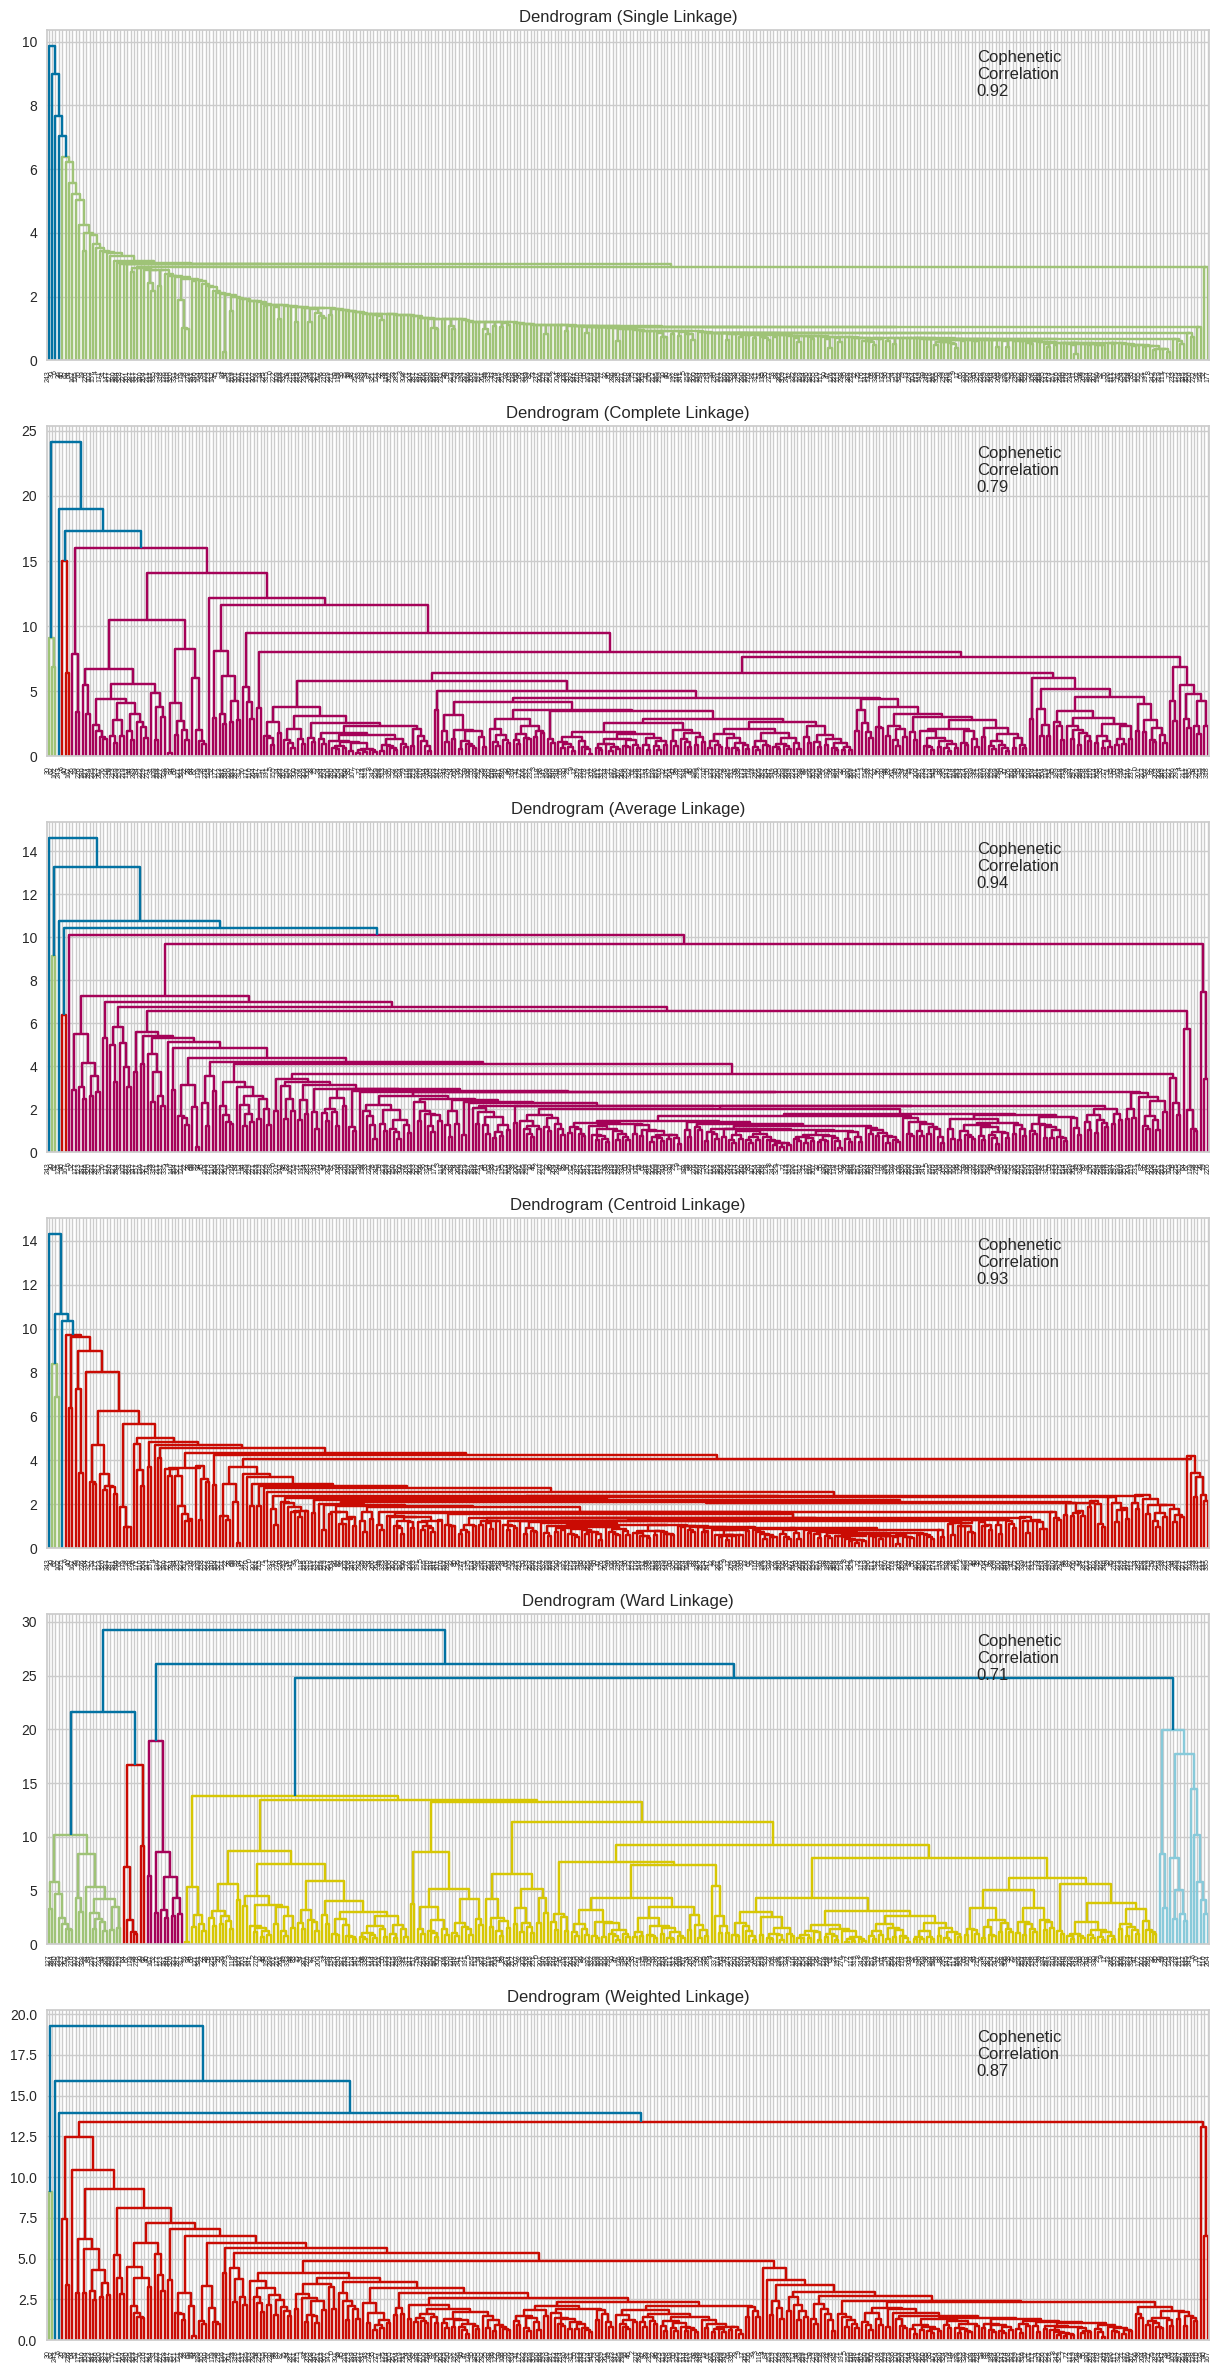

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observation**

As the cophenetic correlation is highest for average linkage method and as per dendogram, no of clusters = 7 is best.

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_com = pd.DataFrame(compare, columns=compare_cols)
df_com = df_com.sort_values(by="Cophenetic Coefficient",ascending=False)
df_com

Linkage  Cophenetic Coefficient
2   average                0.942254
3  centroid                0.931401
0    single                0.923227
5  weighted                0.869378
1  complete                0.787328
4      ward                0.710118

**Observation**

Here also it is double confirmed that average linkage has highest cophenetic coefficient followed by centroid linkage method.

**Creating model using sklearn**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=7, metric="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=7)

**Observation**

So the final model is made with no of clusters =7 with Euclidean distance and average linkage method.

In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

**Cluster Profiling**

In [ ]:
cluster_profile = df1.select_dtypes(include='number').groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["GICS_Sector"].count().values
)

In [ ]:
# let's see the names of the sectors in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following sectors are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["GICS_Sector"].unique())
    print()

In cluster 6, the following sectors are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']

In cluster 5, the following sectors are present:
['Information Technology']

In cluster 2, the following sectors are present:
['Health Care' 'Consumer Discretionary' 'Information Technology']

In cluster 0, the following sectors are present:
['Energy']

In cluster 1, the following sectors are present:
['Financials' 'Information Technology']

In cluster 3, the following sectors are present:
['Information Technology']

In cluster 4, the following sectors are present:
['Consumer Discretionary']



**Observation**

1. Cluster 6 has Industrials, Health Care, Information Technology, Consumer Staples, Utilities, Financials, Real Estate, Materials, Consumer Discretionary, Energy, Telecommunications Services sectors.
2. Cluster 5 has only IT sector.
3. Cluster 2 has Health Care, Consumer Discretionary, Information Technology sectors.
4. Cluster 0 has energy sector.
5. Cluster 1 has financials and IT sectors.
6. Cluster 3 has IT sector.
7. Cluster 4 has consumer discretionary sector.

In [ ]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

Observation

1. Approximately both clustering technique took same time.

2. K Means clustering gave more distinct clusters as cluster 0 has 272 points, cluster 1 has 26 points, cluster 2 has 25 points, cluster 3 has 13 points, cluster 4 has 1 point and cluster 5 has 3 points where as in hierarchial clustering, cluster 0 has 2 points, cluster 1 has 2 points, cluster 2 has 3 points, cluster 3 has 1 point, cluster 4 has 1 point, cluster 5 has 1 point and cluster 6 has 330 points.

3. K Means Clustering investment strategies are based on net income, net cash flow and estimated shares outstanding while Hierarchical clustering is based on P/B ratio, P/E ratio, volatility, ROE, net cash flow, net income, cash ratio, estimated shares outstanding, current price and earning per share.

4. With K Means Clustering:-
(a) Cluster 0 has Industrials, Health Care, Consumer Staples, Utilities, Financials, Real Estate, Information Technology, Materials, Consumer Discretionary, Telecommunications Services, Energy companies. Cluster 0 has total of 272 points and the highest is 52 Industrials sector present followed by 45 financials and 33 consumer discretionary. The Sectors included in cluster 0 focus more on net income than estimated shares outstanding.

(b) Cluster 2 has Information Technology, Health Care, Consumer Discretionary, Real Estate, Telecommunications Services, Energy, Consumer Staples, Materials companies present. Cluster 2 has 25 points and the highest is 9 IT sector followed by 7 health care. Net income, net cash flow and estimated shares outstanding has positive impact for companies in cluster 2.

c. Cluster 5 has health care, consumer discretionary and IT companies present. Cluster 5 has 3 points and each 1 is in consumer discretionary, health care and IT sector.

Net cash flow, net income and estimated shares outstanding is positive.

(d) Cluster 1 has Energy, Materials, Information Technology, Industrials companies present. Cluster 1 has 26 points and it has 22 energy sector present followed by 2 IT sector. Net income is negative. So companies should not focus on net income in cluster 1. Estimated shares outstanding has positive impact as compared to net cash flow.

E. Cluster 3 has Financials, Consumer Discretionary, Health Care, Information Technology, Consumer Staples, Telecommunications Services, Energy companies present. Cluster 3 has 13 points and the highest is 4 financials sector present followed by 3 health care. Sectors in cluster 3 should focus in net income followed by estimated shares outstanding and net cash flow.

(f) Cluster 4 has Consumer Discretionary company present. Cluster 4 has 1 point and the only 1 consumer discretionary sector present. 1. The maximum current price of 1274.94, earnings per share of 50.09 is present in cluster 4. Net cash flow is negative in cluster 4 but net income is positive. Companies or investors should focus on net income.

5. With Hierarchical clustering with no of clusters =7:-
(a) Cluster 6 has 330 points with Industrials, Health Care, Information Technology, Consumer Staples, Utilities, Financials, Real Estate, Materials, Consumer Discretionary, Energy, Telecommunications Services as sectors.

(b) Cluster 5 has only 1 point that is IT sector. The maximum P/B ratio of 129.06 is present in cluster C. Cluster 2 has 3 points and that is Health Care, Consumer Discretionary, Information Technology. The maximum price change of 21.91 is present in cluster 2. The maximum P/E ratio of 400.8 is present in cluster 2.

(d) Cluster 0 has energy sector. The maximum volatility of 3.48 and ROE of 802 is present in cluster 0. E. Cluster 1 has 2 sectors which is financials and IT. The maximum net cash flow and net income is present in cluster 1.

(f) Cluster 3 has 1 sector only which is IT. The maximum cash ratio of 958 is present in cluster 3. The maximum estimated shares outstanding is present in cluster 3.

(g) Cluster 4 has only 1 sector which is consumer discretionary sector. The maximum current price of 1274.94 is present in cluster 4. The maximum Earning per share of 50.09 is present in cluster 4.

**Actionable Insights and Recommendations**

Business Insights

1. The mean price of stocks is 80 dollar with minimum price of 4.50 dollar and maximum price of 1274.94 dollar. 75% of stocks are below 92.88 dollar. The mean current price is highest for health care industry with current price as 132.04 followed by consumer discretionary with current price as 128.09 and real estate with current price as 90.97.

2. The mean percentage change in stock price in 13 weeks is 4.078% The mean price change is highest for health care followed by consumer staples and IT.

3. The mean volatility which is standard deviation of stock price in past 13 weeks is 1.52. The mean volatility is highest for energy industry followed by materials and IT.

4. The mean ROE which is net income by shareholder’s equity is 39.59 The mean ROE is highest and approximately equal to Consumer staples and energy followed by Industrials.

5. The mean cash ratio is 70.02 which is ratio of total of cash and cash equivalents to its total current liabilities. The mean cash ratio is highest for IT industry with cash ratio as 149.81 followed by telecommunications services with cash ratio as 117 and health care with cash ratio as 103.77

6. The mean net income is highest for Telecommunications service followed by Financials and Consumer staples. The mean net cash flow is highest for IT and negative for telecommunications services

7. The mean Earning per share(Company's net profit divided by the number of common shares it has outstanding (in dollars)) is 2.77. 75% of earning per share is below 4.62. The mean earnings per share is highest and approximately equal for Industrials, Health care and Consumer Discretionary.

8. The mean estimated shares outstanding is highest for Telecommunications services followed by Consumer Staples and IT.

9. The mean P/E ratio which is ratios of company’s current stock price to earning per share is 32.61 The mean P/E ratio is highest for energy industry followed by IT, Real estate and health care

10. The mean P/B ratio which is Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities) is -1.71 The mean P/B ratio is highest for IT sector followed by Energy sector. Other sectors have negative mean P/B Ratio with respect to GICS Sector.

11. The total of GICS Sector is 11. 15.6% stocks are of Industrial sector; 14.4% are of Financial Sector; 11.8% of Health care and Consumer Discretionary; 9.7% of IT; 8.8% of energy and min stocks of 1.5% are of Telecommunications Services.

12. The max GICS Sub industry frequency is of Oil and Gas Exploration and Production.

13. 7% stocks are of Oil & Gas Exploration & Production Industry; 4.1% are of REIT and Industrial Conglomerates industry; 3.5% are of Electric Utilities and Internet Software & Services Industry and the minimum 1.8% stocks are of Pharmaceuticals, Packaged Foods & Meats, Oil & Gas Refining & Marketing & Transportation and Semiconductors Industry.

14. With K Means Clustering:-

(a) Cluster 0 has Industrials, Health Care, Consumer Staples, Utilities, Financials, Real Estate, Information Technology, Materials, Consumer Discretionary, Telecommunications Services, Energy companies. Cluster 0 has total of 272 points and the highest is 52 Industrials sector present followed by 45 financials and 33 consumer discretionary. The Sectors included in cluster 0 focus more on net income than estimated shares outstanding.

(b) Cluster 2 has Information Technology, Health Care, Consumer Discretionary, Real Estate, Telecommunications Services, Energy, Consumer Staples, Materials companies present. Cluster 2 has 25 points and the highest is 9 IT sector followed by 7 health care. Net income, net cash flow and estimated shares outstanding has positive impact for companies in cluster 2.

(c) Cluster 5 has health care, consumer discretionary and IT companies present. Cluster 5 has 3 points and each 1 is in consumer discretionary, health care and IT sector. Net cash flow, net income and estimated shares outstanding is positive.

(d) Cluster 1 has Energy, Materials, Information Technology, Industrials companies present. Cluster 1 has 26 points and it has 22 energy sector present followed by 2 IT sector. Net income is negative. So companies should not focus on net income in cluster 1. Estimated shares outstanding has positive impact as compared to net cash flow.

(e) Cluster 3 has Financials, Consumer Discretionary, Health Care, Information Technology, Consumer Staples, Telecommunications Services, Energy companies present. Cluster 3 has 13 points and the highest is 4 financials sector present followed by 3 health care. Sectors in cluster 3 should focus in net income followed by estimated shares outstanding and net cash flow.

(f) Cluster 4 has Consumer Discretionary company present. Cluster 4 has 1 point and the only 1 consumer discretionary sector present. 1. The maximum current price of 1274.94, earnings per share of 50.09 is present in cluster 4. Net cash flow is negative in cluster 4 but net income is positive. Companies or investors should focus on net income.

15. With Hierarchical clustering with no of clusters =7:-
(a) Cluster 6 has 330 points with Industrials, Health Care, Information Technology, Consumer Staples, Utilities, Financials, Real Estate, Materials, Consumer Discretionary, Energy, Telecommunications Services as sectors.

(b) Cluster 5 has only 1 point that is IT sector. The maximum P/B ratio of 129.06 is present in cluster

(c) Cluster 2 has 3 points and that is Health Care, Consumer Discretionary, Information Technology. The maximum price change of 21.91 is present in cluster 2. The maximum P/E ratio of 400.8 is present in cluster 2.

(d) Cluster 0 has energy sector. The maximum volatility of 3.48 and ROE of 802 is present in cluster 0.

(e) Cluster 1 has 2 sectors which is financials and IT. The maximum net cash flow and net income is present in cluster 1.

(f) Cluster 3 has 1 sector only which is IT. The maximum cash ratio of 958 is present in cluster 3. The maximum estimated shares outstanding is present in cluster 3.

(g) Cluster 4 has only 1 sector which is consumer discretionary sector. The maximum current price of 1274.94 is present in cluster 4. The maximum Earning per share of 50.09 is present in cluster 4.

**Business Recommendations**

1. Investors focusing on current price should target on health care, consumer discretionary and real estate.
2. As the current price is highest for health care therefore the price change is maximum for health care.
3. Energy industry has maximum volatility in past 13 weeks.
4. ROE is highest for consumer staples and Industrials.
5. Cash ratio is highest for IT and telecommunications. As IT industry do not require much infrastructure therefore this industry has maximum cash ratio.
6. Mean net income is highest for telecommunications and mean net cash flow is highest for IT. As cash ratio is highest for Telecommunications and IT, therefore net income and net cash flow is highest for these as they have more cash reserved as compared to other industries.
7. Mean EPS is highest for industrials, health care and consumer discretionary.
8. Mean estimated shares outstanding is highest for Telecommunication and IT.
9. Mean P/E is highest for IT, real estate and health care as EPS is also highest for IT.
10. Mean P/B ratio is highest for IT.
11. The maximum stocks are of Industrial Sector followed by Financials, health care and Consumer discretionary. The minimum stocks are of telecommunications services. The maximum stock price is sub industry is of Oil and Gas Exploration and Production & REIT.
12. With K means clustering with no f clusters as 6:
(a) Cluster 2 has IT, health care, telecommunications, real estate, consumer discretionary sectors. Investors target on investing for companies in cluster 2 should consider net income, net cash flow and estimated shares outstanding before investing.

(b) Cluster 5 has health care, IT and consumer discretionary as sectors. Investors interested in companies of cluster 5 should focus on Net cash flow, net income and estimated shares outstanding.

(c) Cluster 1 has energy, materials, IT and Industrials. Investors should never look into net income for making decision for investment in cluster 1 companies and should focus on estimated shares outstanding.

(d) Cluster 3 has Financials, consumer discretionary, health care, IT and telecommunications sector. Investors should focus more on net income as compared to estimated shares outstanding and net cash flow if intertested in investing in cluster 3 industry.

(e) Cluster 4 only has consumer discretionary. Investors should focus on net income and never focus on net cash flow for cluster 4 companies.

(f) Cluster 0 has Industrials, Health Care, Consumer Staples, Utilities, Financials, Real Estate, Information Technology, Materials, Consumer Discretionary, Telecommunications Services, Energy companies. Investors investing in cluster 0 industry should focus on net income and estimated shares outstanding.

13. With Hierarchical Clustering:
(a) Cluster 5 only has IT. Maximum P/B ratio is in cluster 5. Investors investing in cluster 5 companies should make decision on basis of P/B ratio.

(b) Cluster 2 has health care, consumer discretionary and IT. Investors investing in cluster 2 make decisions on basis of price change and P/E ratio.

(c) Cluster 0 has only energy sector. Investors investing in cluster 0 should focus on volatility and ROE.

(d) Cluster 1 has IT and Financials. Investors investing in cluster 1 should focus on net cash flow and net income.

(e) Cluster 3 has only IT sector. Investors investing in cluster 3 should focus on cash ratio and estimated shares outstanding.

(f) Cluster 4 has only consumer discretionary sector. Investors investing in cluster 4 should focus on current price and Earning per share.

(g) Cluster 6 has Industrials, health care, IT, Financials, Real estate, consumer discretionary, telecommunications sectors.

14. K Means Clustering investment strategies are based on net income, net cash flow and estimated shares outstanding while Hierarchical clustering is based on P/B ratio, P/E ratio, volatility, ROE, net cash flow, net income, cash ratio, estimated shares outstanding, current price and earning per share.